In [1]:
%run "./2_Methods.ipynb"

In [2]:
#print(f'Available CPUs: {mproc.cpu_count()}')
print(f'Configured user-id: {TARGET_CLASS_USER_ID}')
print(f'Configured password: {DATA_PASSWORD}')
print(f'Positive class data: {positive_class_data.shape[0]} samples with {feature_count} features')

Configured user-id: 999
Configured password: greyc laboratory
Positive class data: 115 samples with 76 features


# Plot Input Data

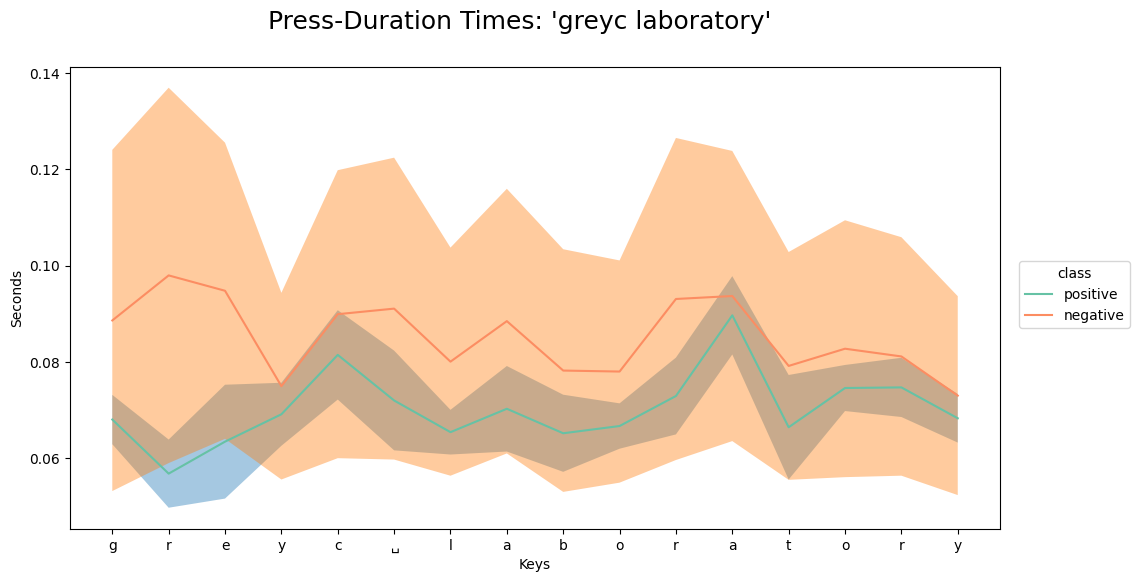

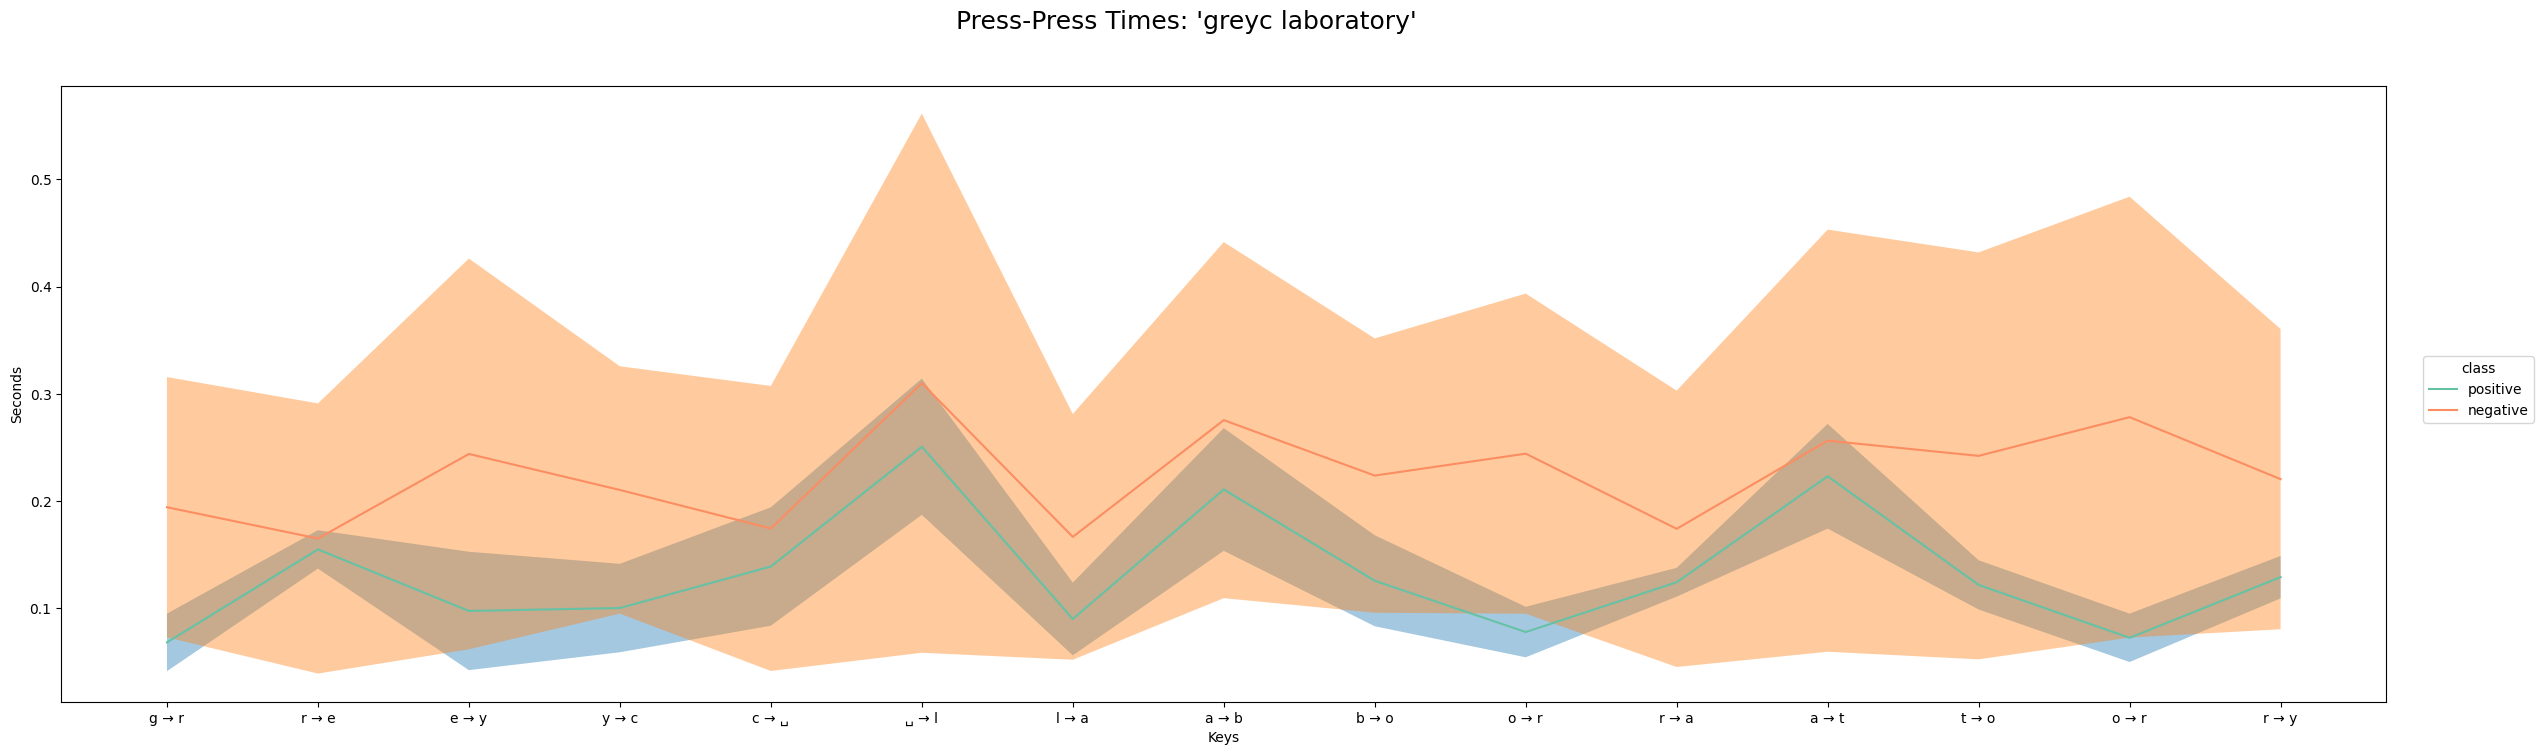

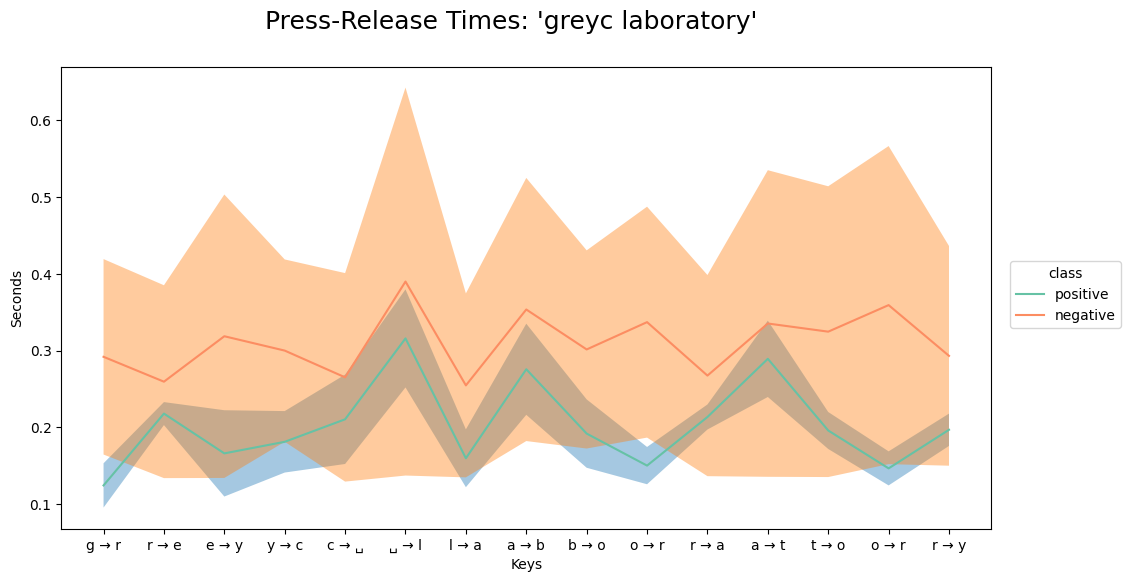

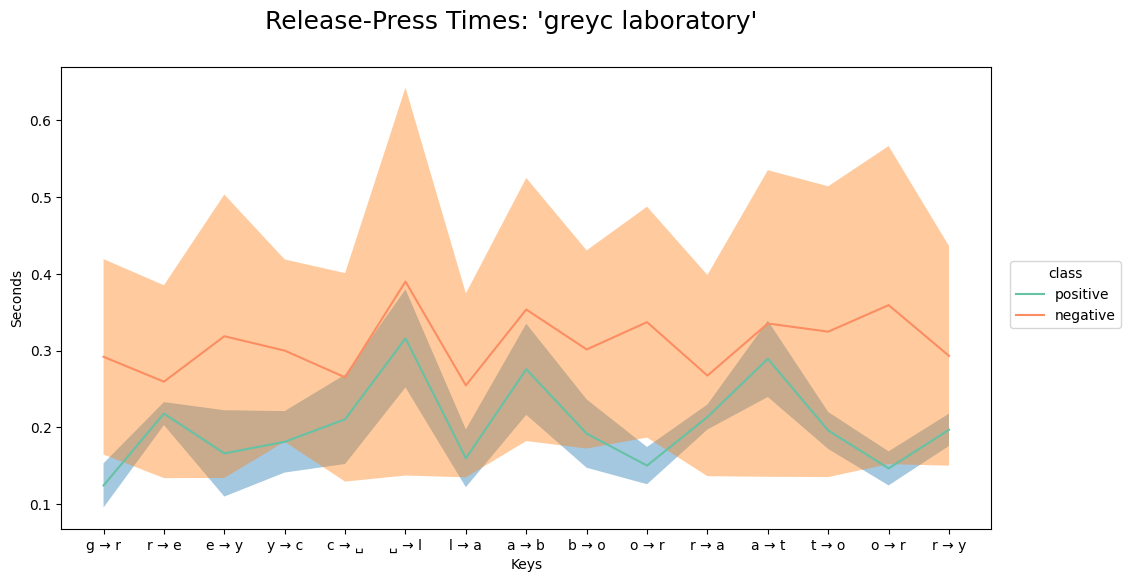

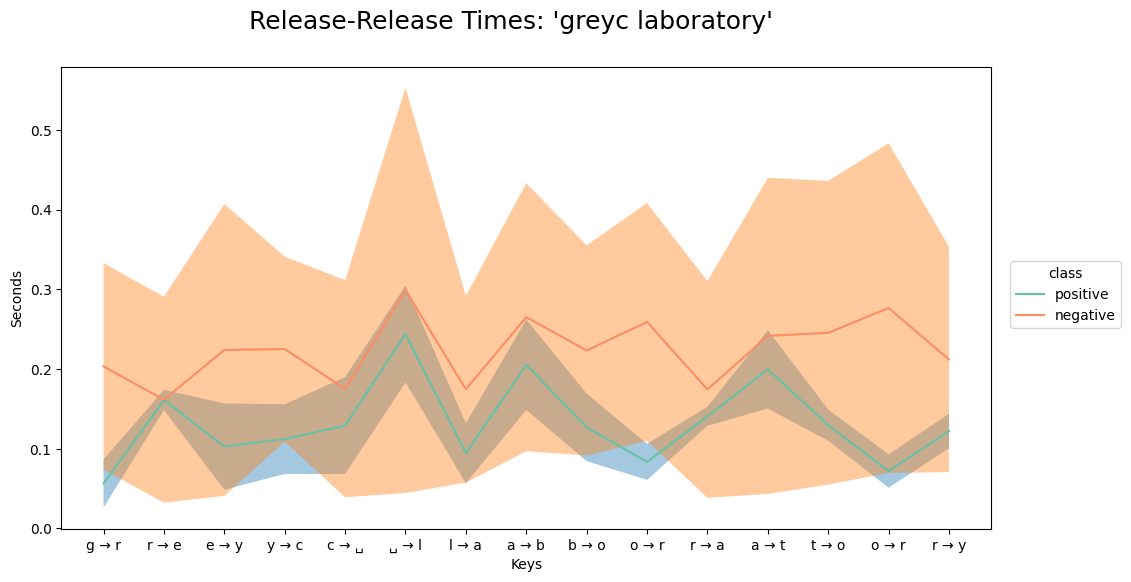

In [16]:
%matplotlib inline

# for graph visualization purposes, comment out for computations:
binary_class_data.loc[binary_class_data[CLASS_COL] != positive_class, [CLASS_COL]] = 'negative'
binary_class_data.loc[binary_class_data[CLASS_COL] == positive_class, [CLASS_COL]] = 'positive'

plot_d_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None, 
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )
plot_pp_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None,
              trim_outliers=True,
              display=True,
              save=False
         )
plot_pr_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None, 
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )
plot_rp_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None,
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )
plot_rr_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None,
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )

# Data Augmentation

In [14]:
# Broken down into steps for visualization purposes, 
# actual generation for classification input data happens in the Autoencoder class
positive = positive_class_data[DATA_COLS].values
(normalized, maxima, minima) = normalize(positive)
generated_similar = synthesize_normal(normalized, 500)
denormalized = denormalize(generated_similar, maxima, minima) # = augmented
generated_dissimilar = synthesize_dissimilar(positive, 5000)
true_negative = negative_class_data[DATA_COLS].values

positive_dataframe = create_dataframe(positive, 'positive', DATA_COLS)
normalized_dataframe = create_dataframe(normalized, 'normalized', DATA_COLS)
generated_similar_dataframe = create_dataframe(generated_similar, 'similar (generated)', DATA_COLS)
denormalized_dataframe = create_dataframe(denormalized, 'denormalized (augmented)', DATA_COLS)
augmented_dataframe = create_dataframe(denormalized, 'augmented', DATA_COLS)
generated_dissimilar_dataframe = create_dataframe(generated_dissimilar, 'dissimilar (generated)', DATA_COLS)
true_negative_dataframe = create_dataframe(true_negative, 'negative', DATA_COLS)

#### POSITIVE class vs NEGATIVE class: 

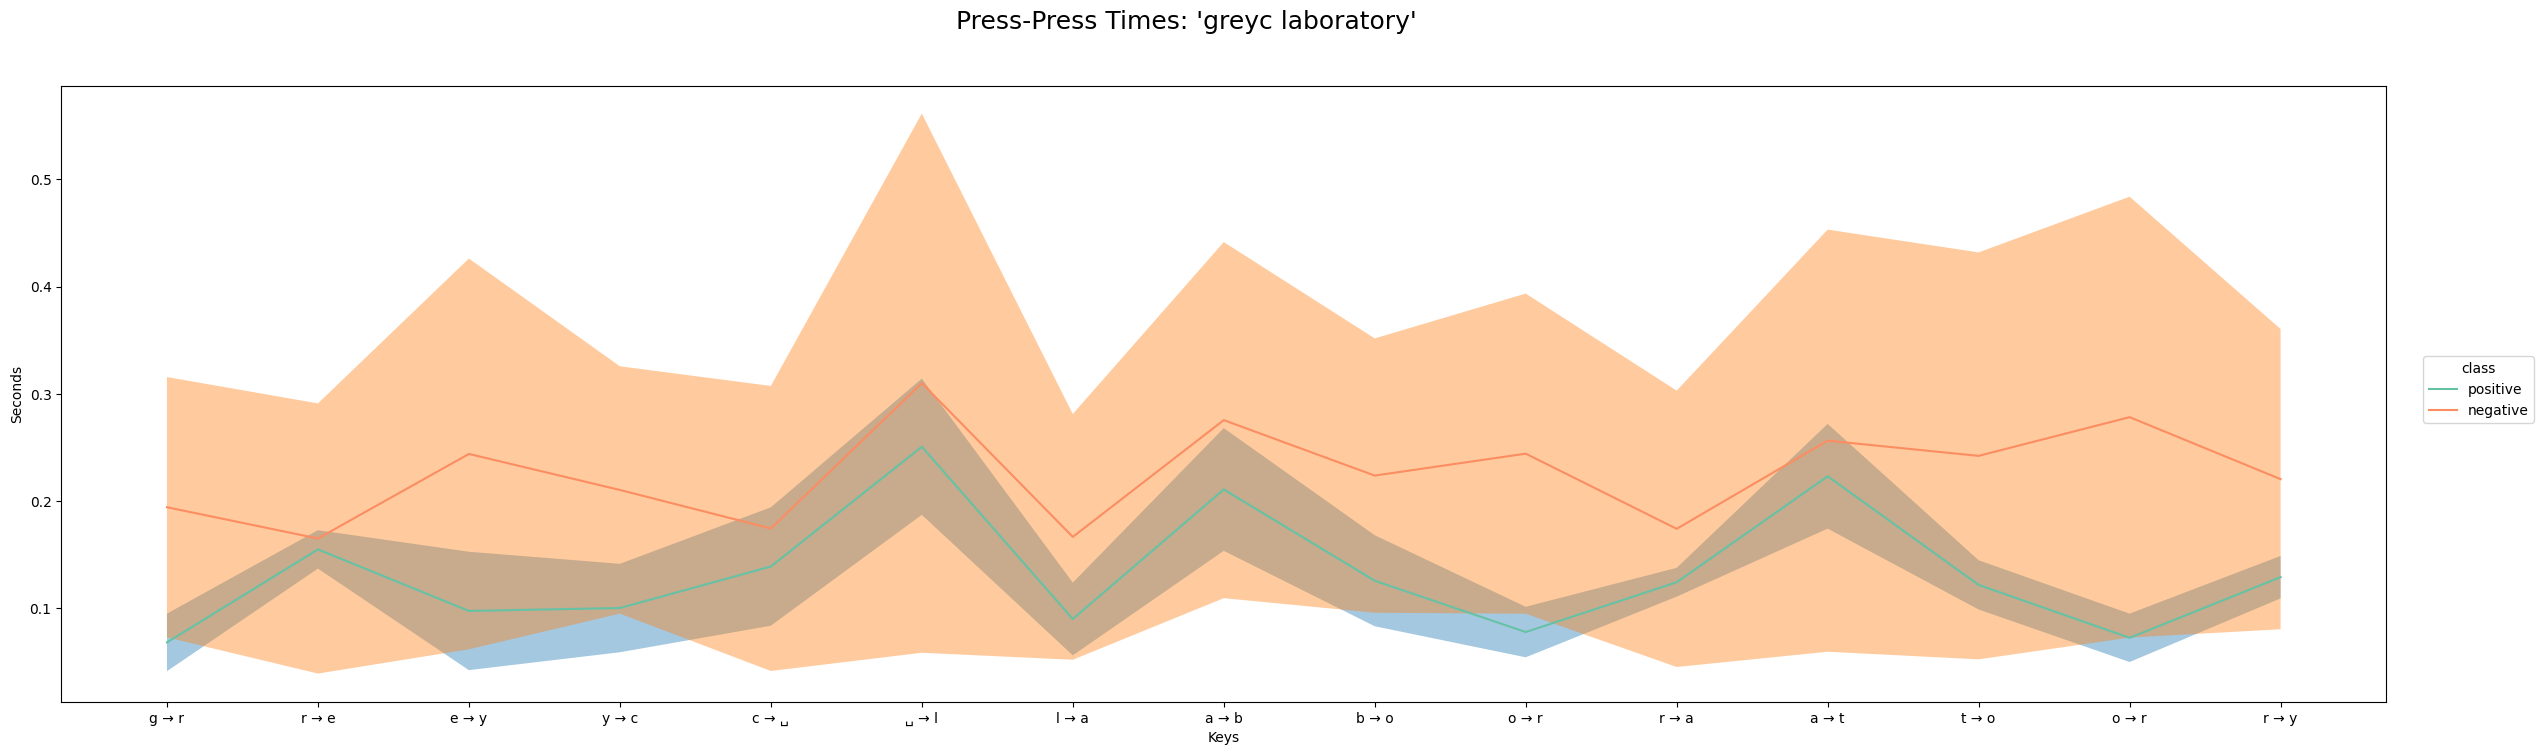

In [4]:
combined_dataframe = pd.concat([positive_dataframe, true_negative_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'negative'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### NORMALIZATION step:

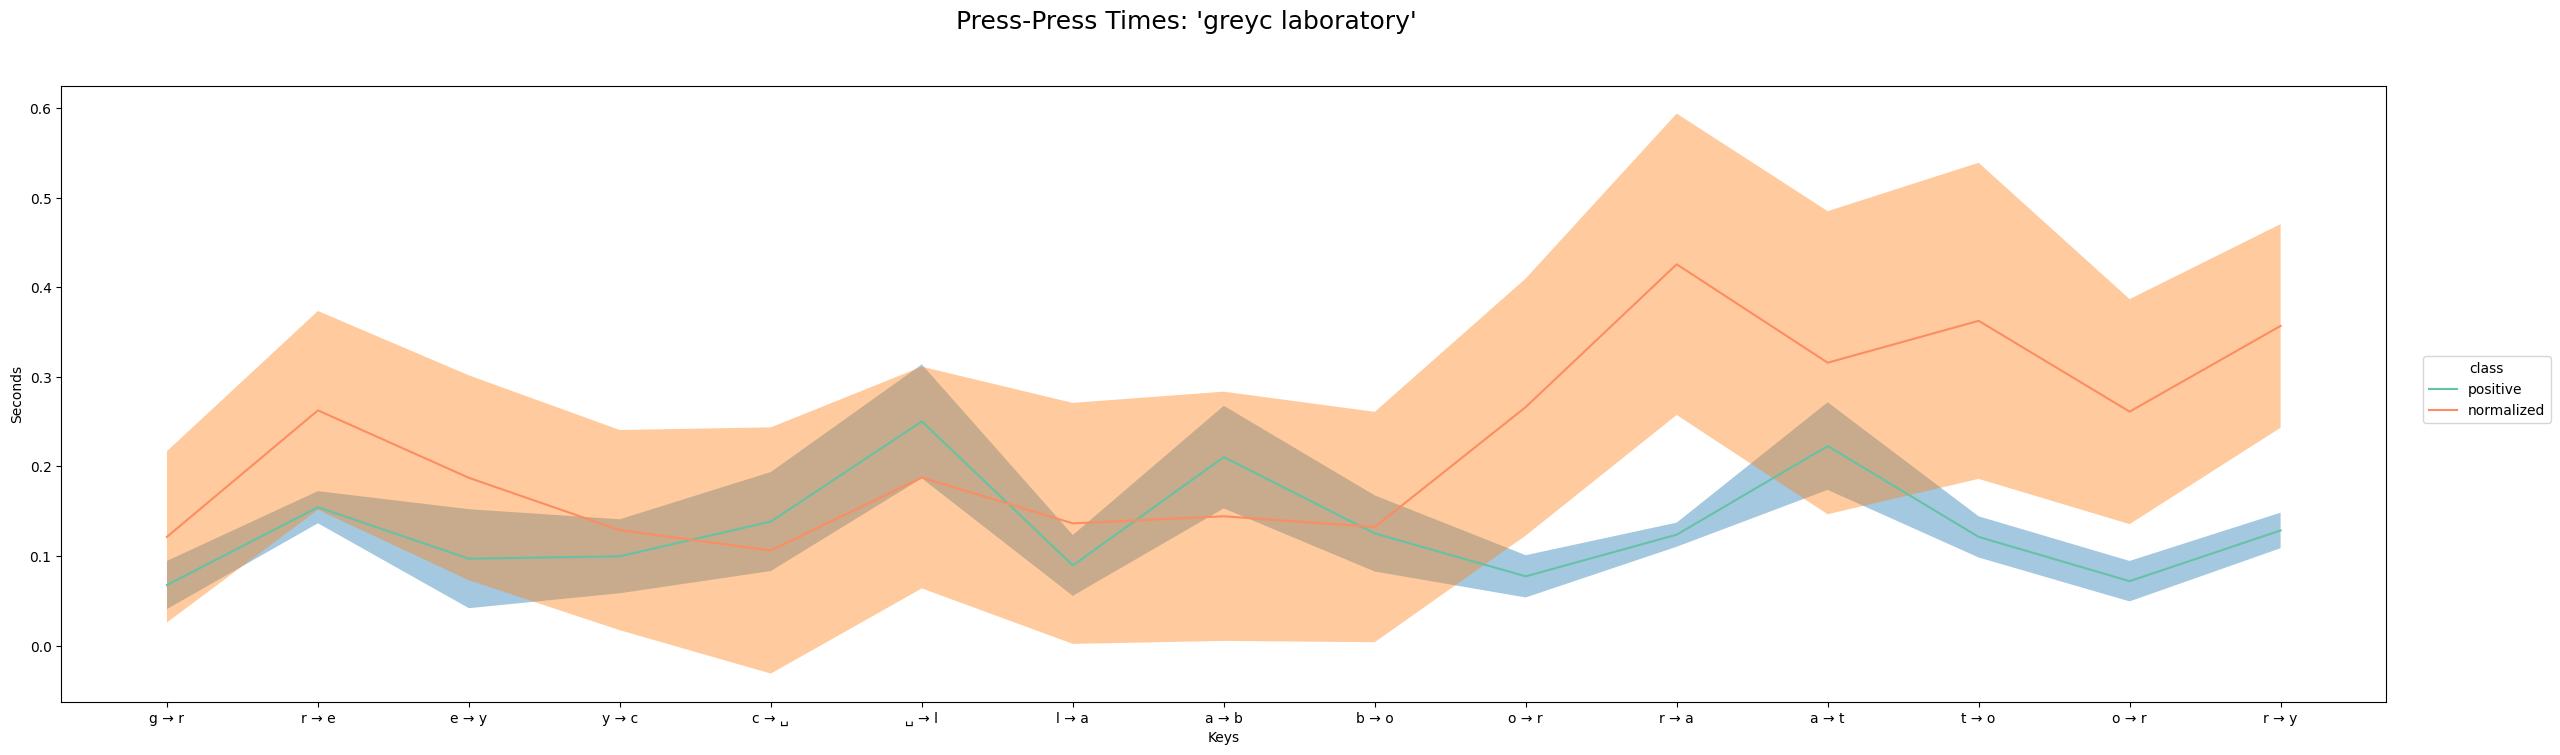

In [5]:
combined_dataframe = pd.concat([positive_dataframe, normalized_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'normalized'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### AUGMENTATION step (similar data generation):

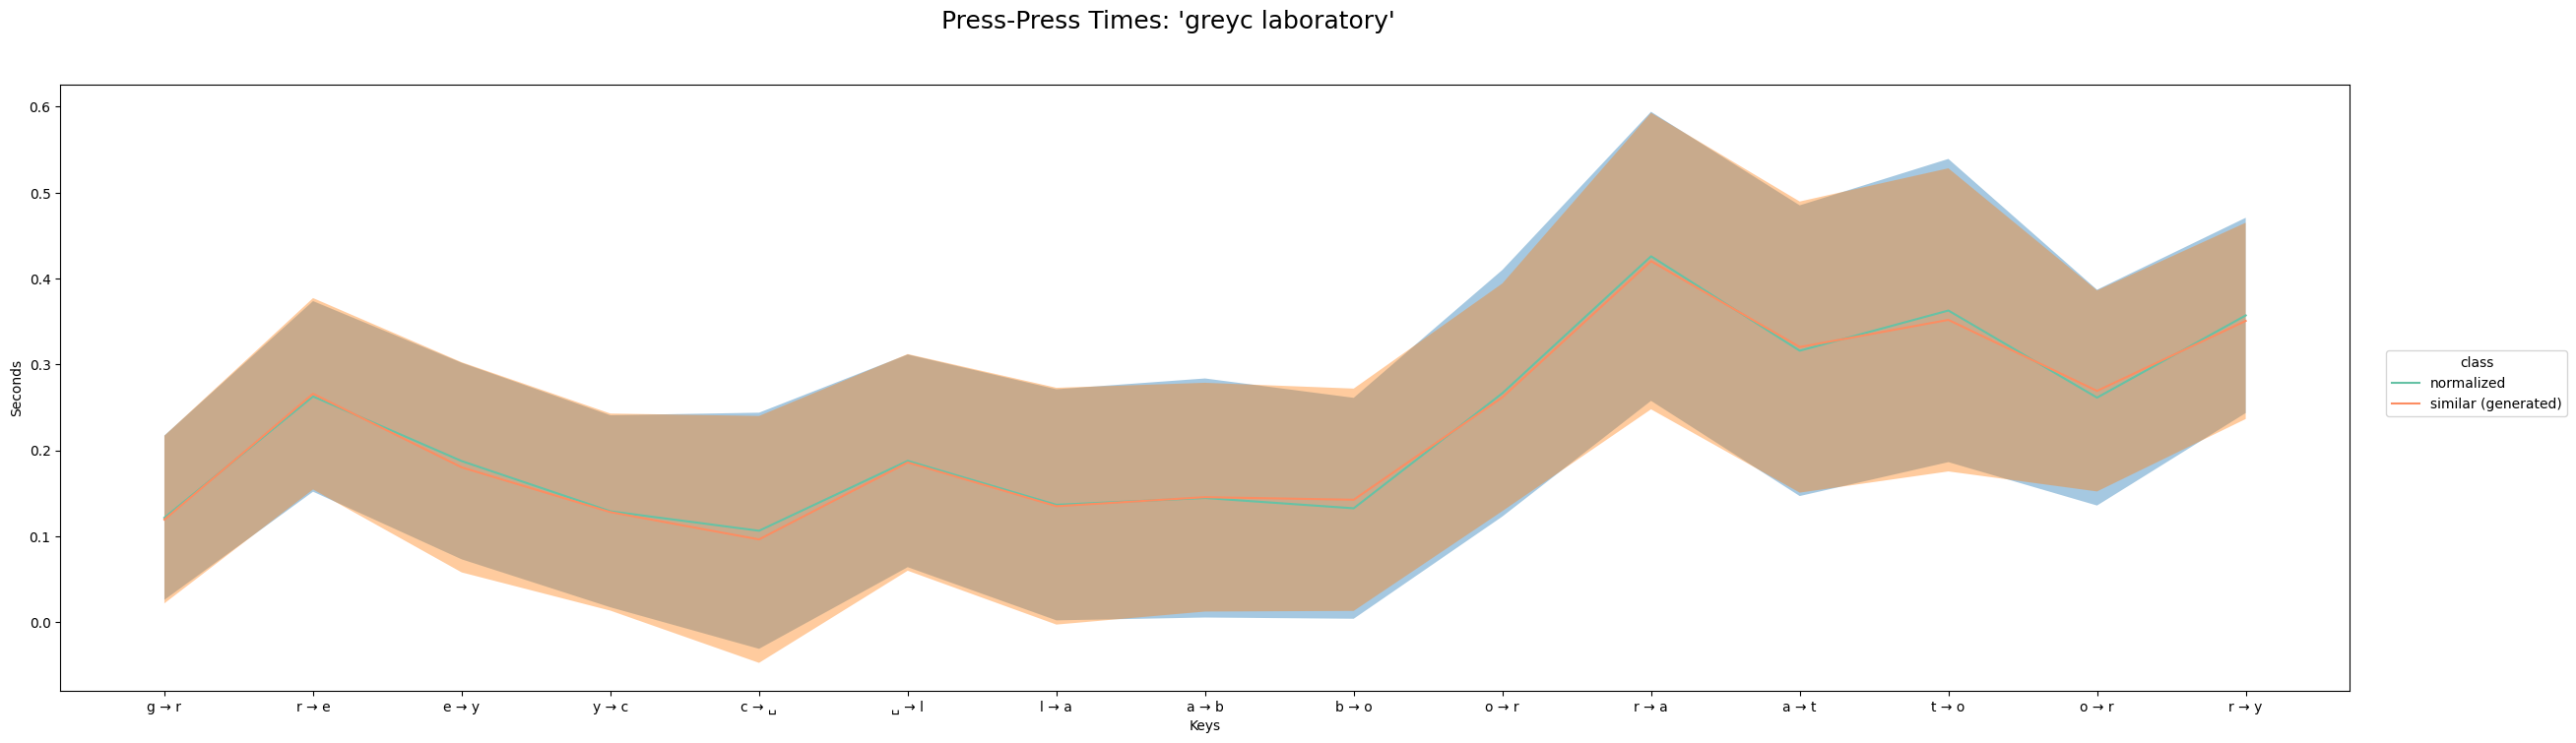

In [6]:
combined_dataframe = pd.concat([normalized_dataframe, generated_similar_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['normalized', 'similar (generated)'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### DENORMALIZATION step (transforming augmented data to look like positive class):

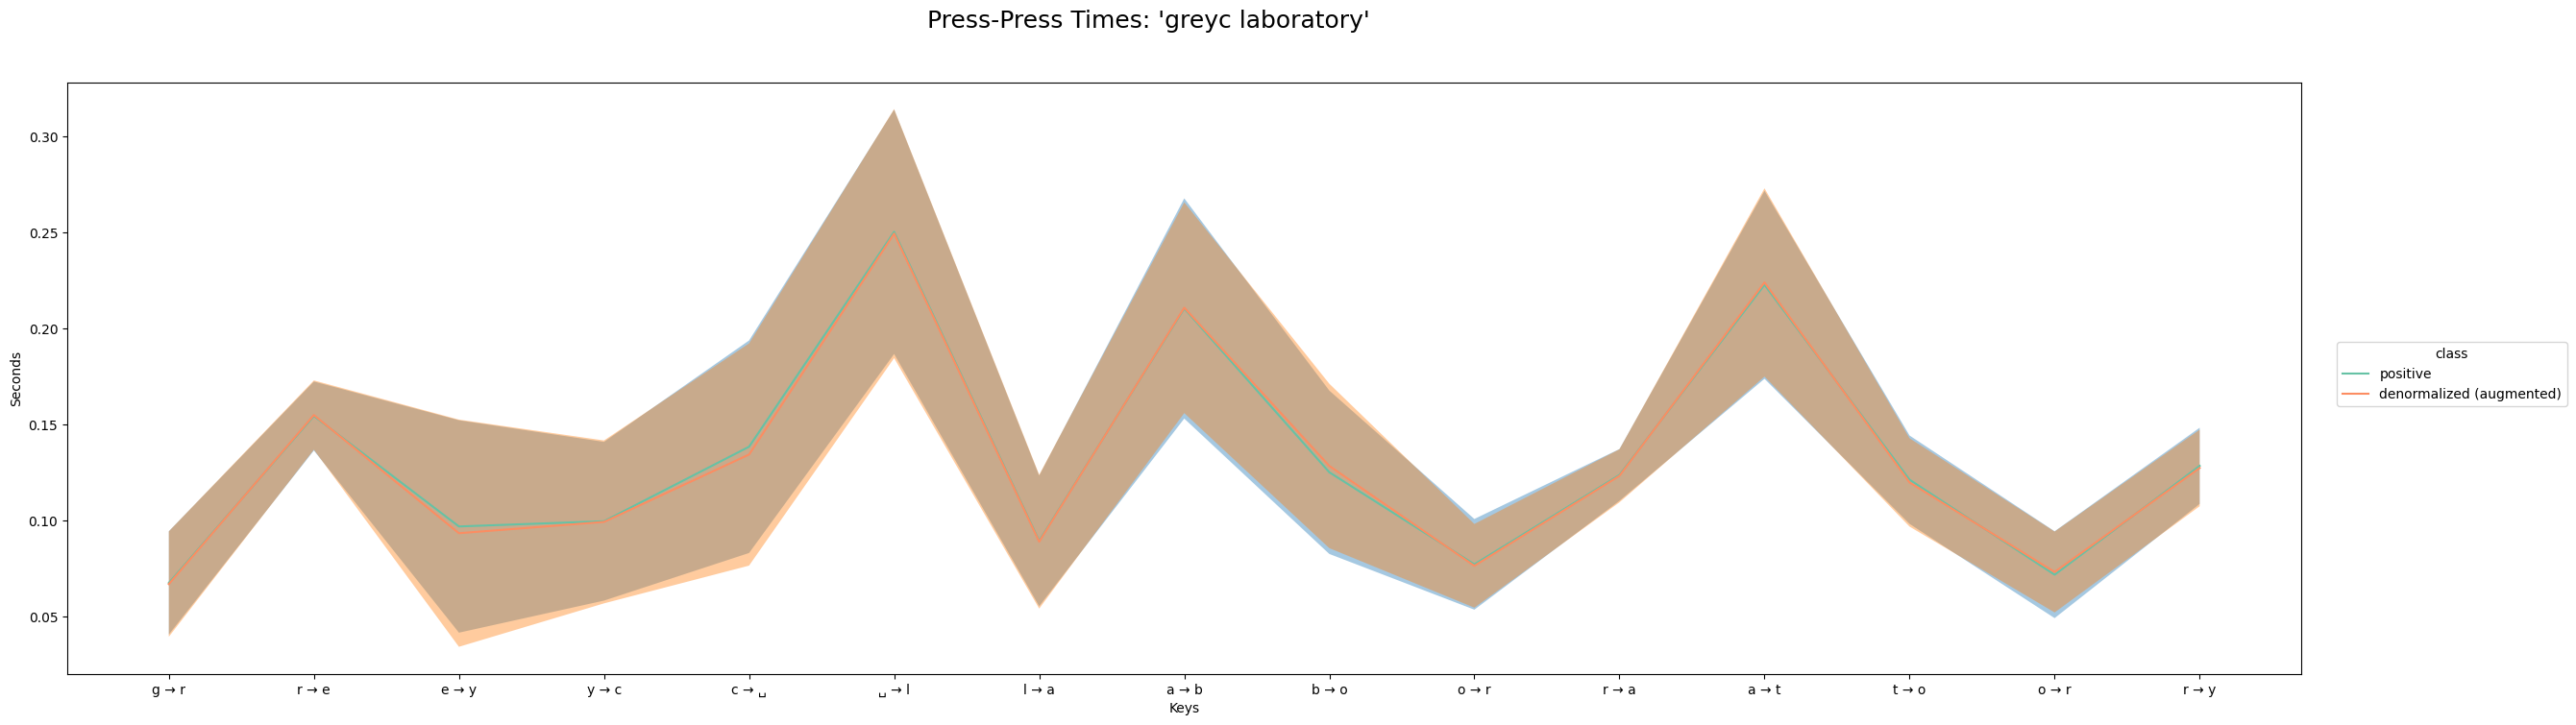

In [7]:
combined_dataframe = pd.concat([positive_dataframe, denormalized_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'denormalized (augmented)'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### GENERATING NEGATIVE data (dissimilar data generation):

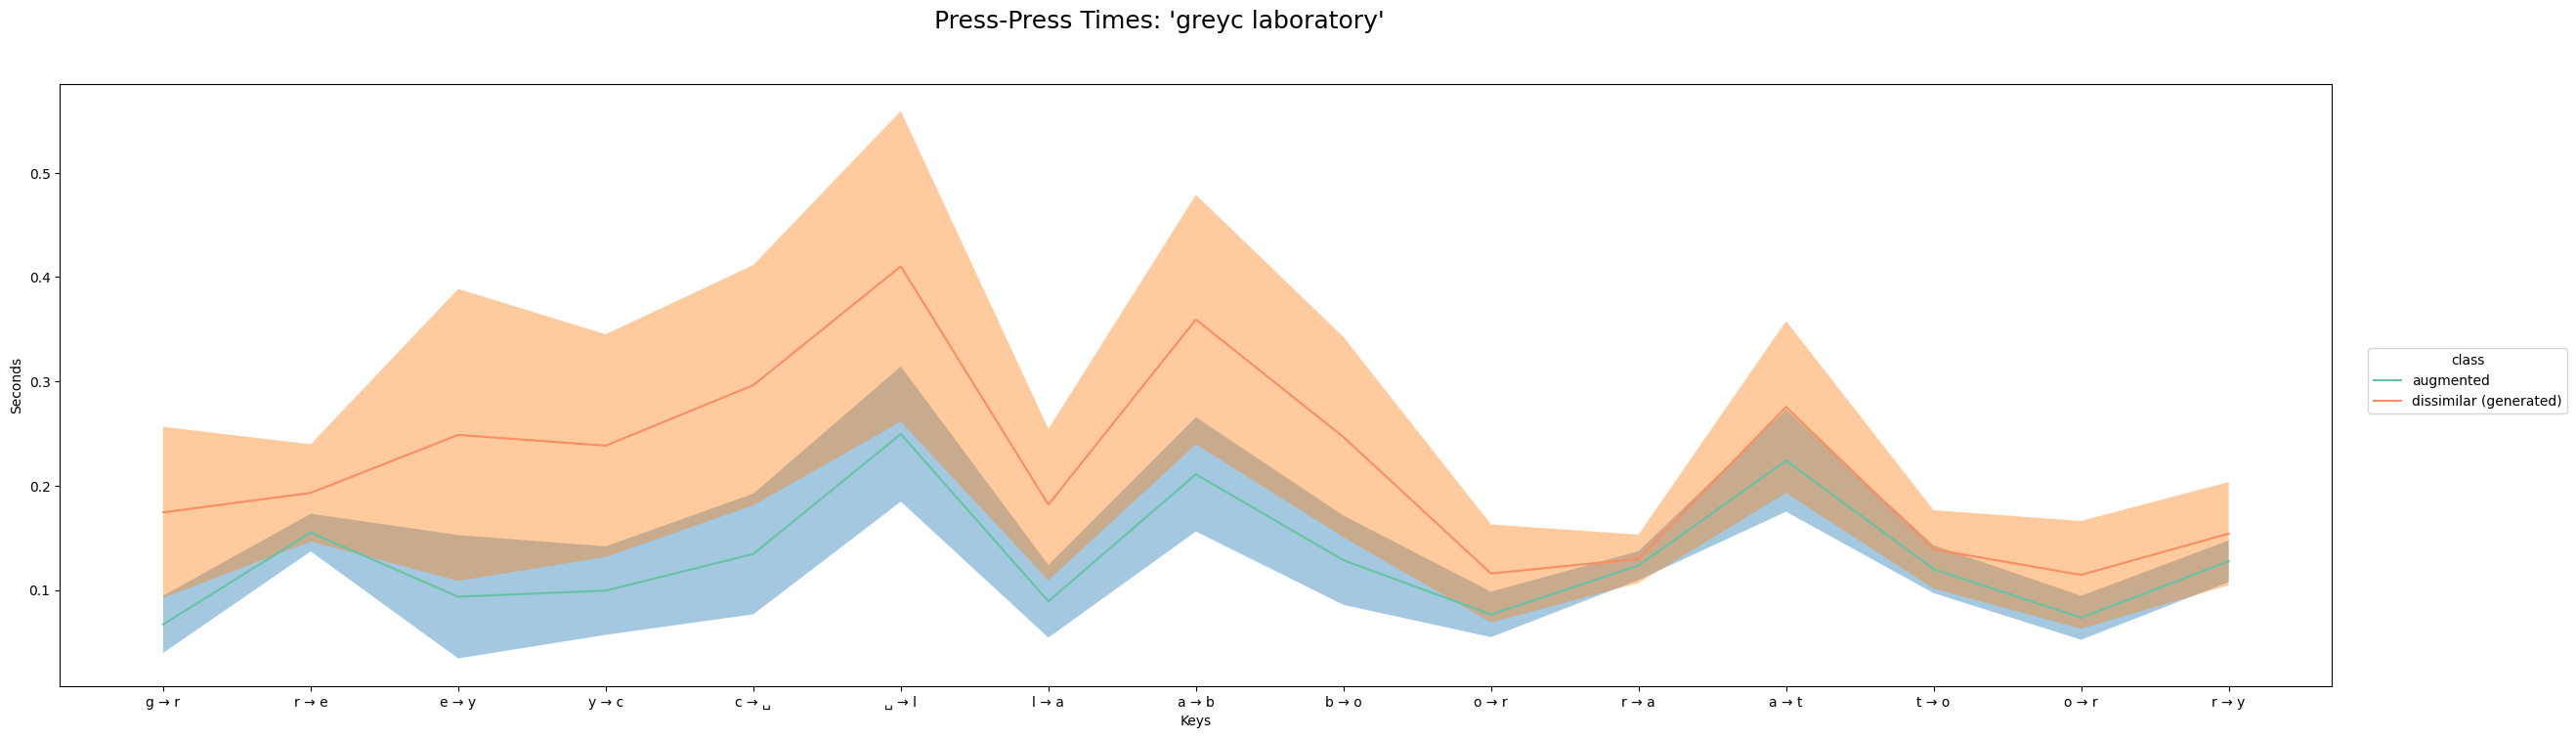

In [8]:
combined_dataframe = pd.concat([augmented_dataframe, generated_dissimilar_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['augmented', 'dissimilar (generated)'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### POSITIVE vs GENERATED DISSIMILAR vs NEGATIVE classes:

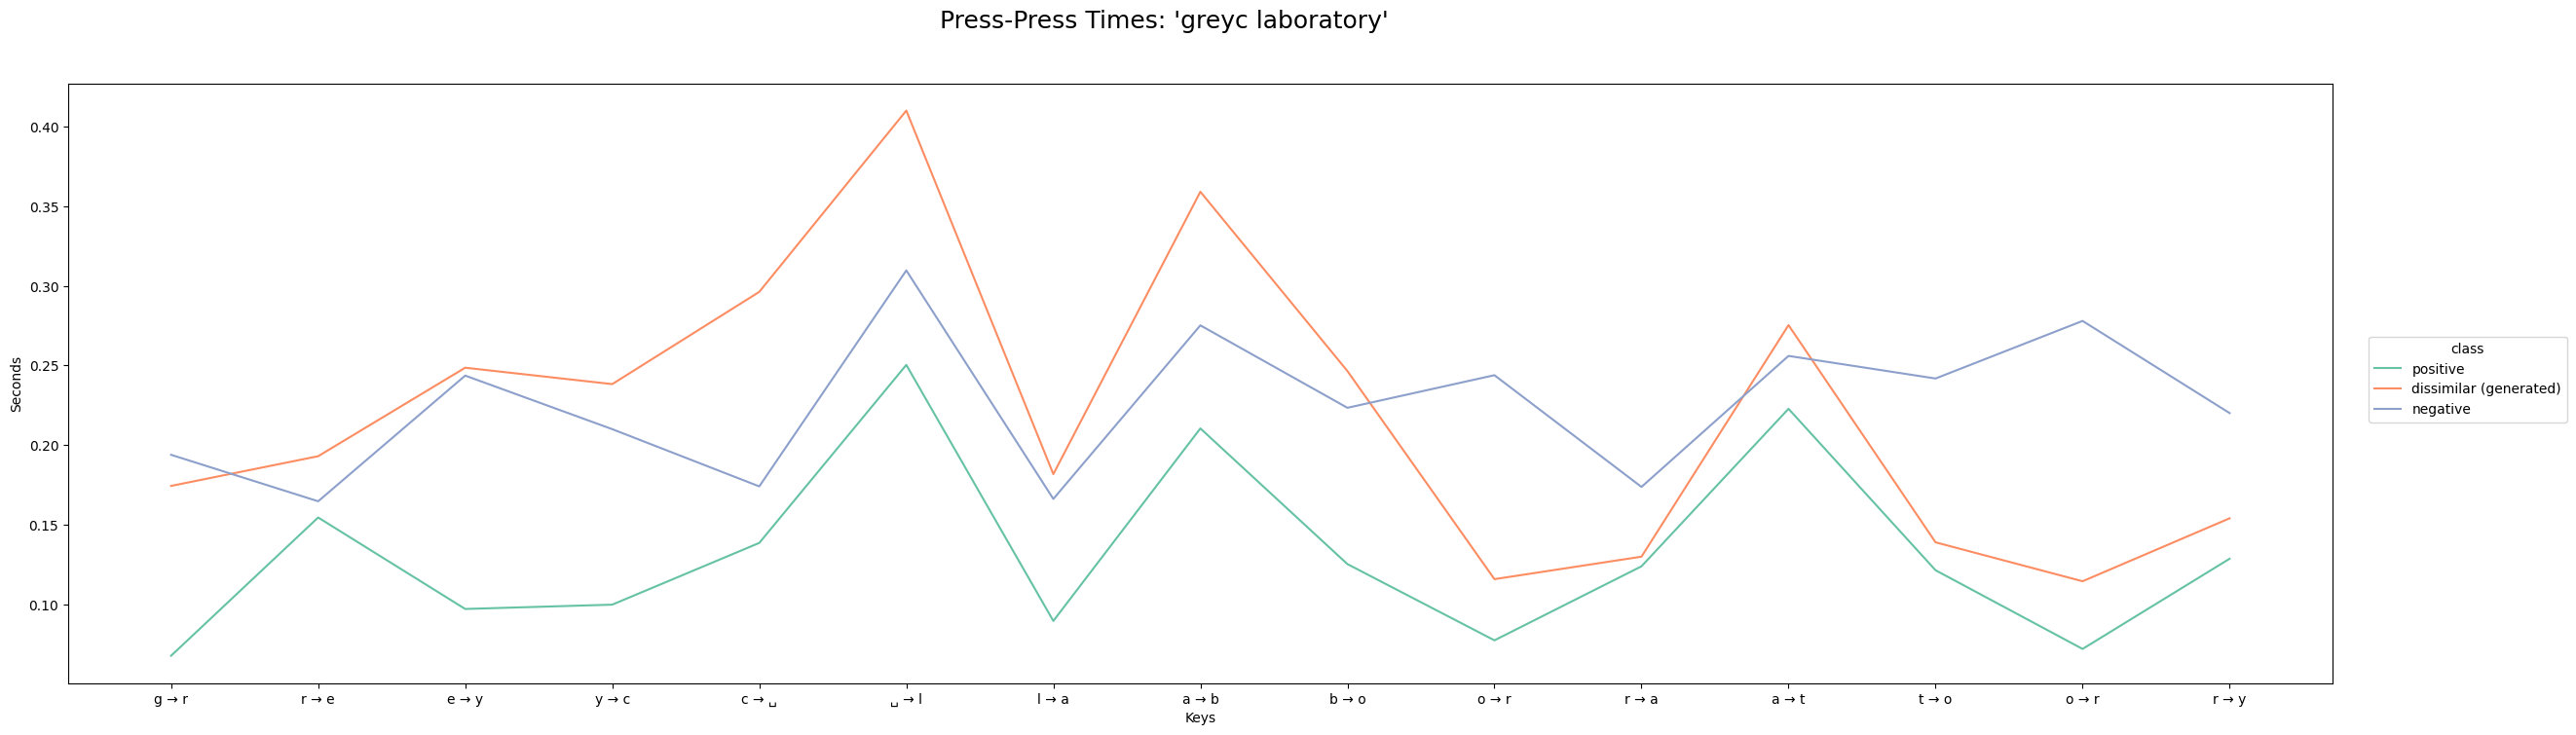

In [9]:
combined_dataframe = pd.concat([positive_dataframe, generated_dissimilar_dataframe, true_negative_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')
    
plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'dissimilar (generated)', 'negative'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

# Autoencoder Evaluation

In [3]:
%run "./3_Autoencoder.ipynb"
# Hyperparameter evaluation code moved to 3_Autoencoder.ipynb
# 
# Evaluating autoencoders and writing to .csv file for analysis

#find_autoencoder_hyperparameters(positive_class_data, DATA_PASSWORD, direct_to_file=True)

### Evaluating Best Performing Autoencoders:

In [4]:
# Find well-performing autoencoders: 
evaluated_autoencoders = find_autoencoder_hyperparameters(positive_class_data, DATA_PASSWORD)    

Starting sequential evaluation for 120 autoencoders:
Starting initialization on autoencoder #1.
Finished training autoencoder #1 after 12.82 seconds.
Starting initialization on autoencoder #2.
Finished training autoencoder #2 after 12.31 seconds.
Starting initialization on autoencoder #3.
Finished training autoencoder #3 after 12.81 seconds.
Starting initialization on autoencoder #4.
Finished training autoencoder #4 after 12.80 seconds.
Starting initialization on autoencoder #5.
Finished training autoencoder #5 after 12.46 seconds.
Starting initialization on autoencoder #6.
Finished training autoencoder #6 after 12.67 seconds.
Starting initialization on autoencoder #7.
Finished training autoencoder #7 after 12.65 seconds.
Starting initialization on autoencoder #8.
Finished training autoencoder #8 after 12.90 seconds.
Starting initialization on autoencoder #9.
Finished training autoencoder #9 after 12.54 seconds.
Starting initialization on autoencoder #10.
Finished training autoencoder 

#### Top 10:

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 910039640
  epochs trained: 150
L2 norms:
  positive: 0.002496364526450634
  negative: 86.0899887084961
  delta: 86.08749389648438
  ratio: 34485.14453125
 


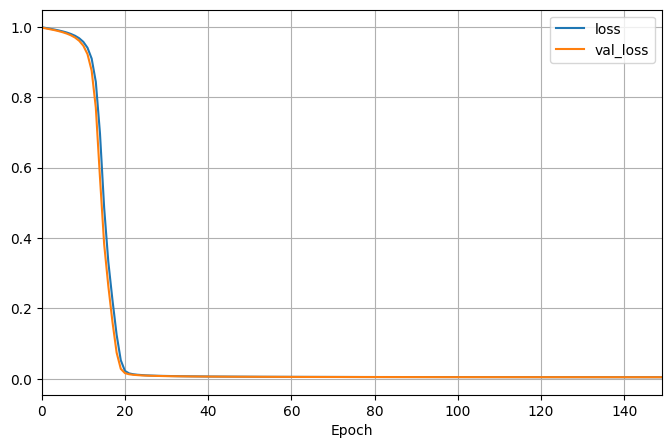

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: Adagrad
  learning rate: 0.05
  loss function: Hinge
  random seed: 839135933
  epochs trained: 150
L2 norms:
  positive: 0.008922760374844074
  negative: 98.42071533203125
  delta: 98.41178894042969
  ratio: 11029.298828125
 


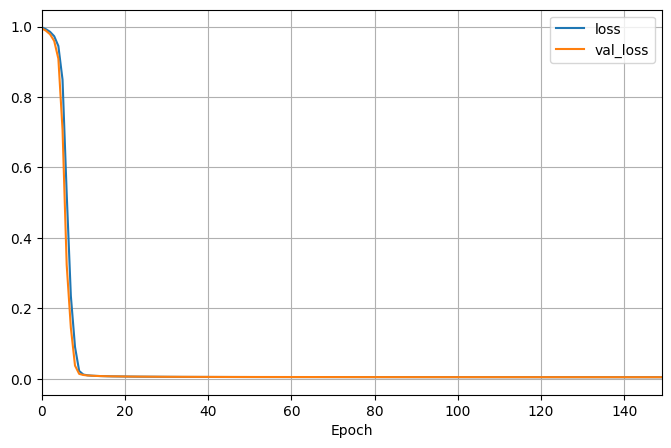

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: RMSprop
  learning rate: 0.05
  loss function: Hinge
  random seed: 377971239
  epochs trained: 52
L2 norms:
  positive: 0.01798347942531109
  negative: 188.95059204101562
  delta: 188.93260192871094
  ratio: 10505.8984375
 


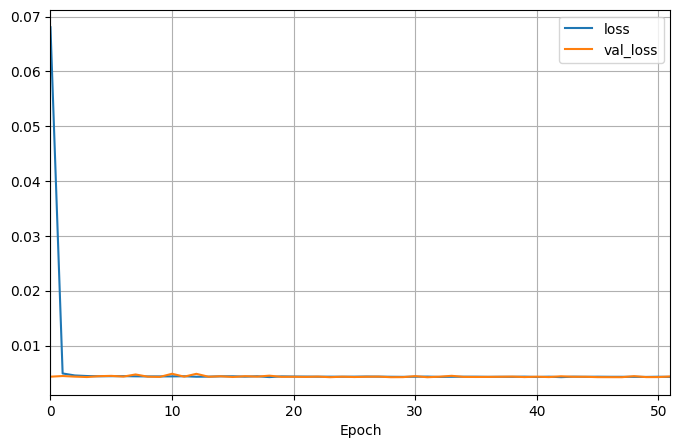

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 985265394
  epochs trained: 150
L2 norms:
  positive: 0.008543355390429497
  negative: 84.58330535888672
  delta: 84.57476043701172
  ratio: 9899.478515625
 


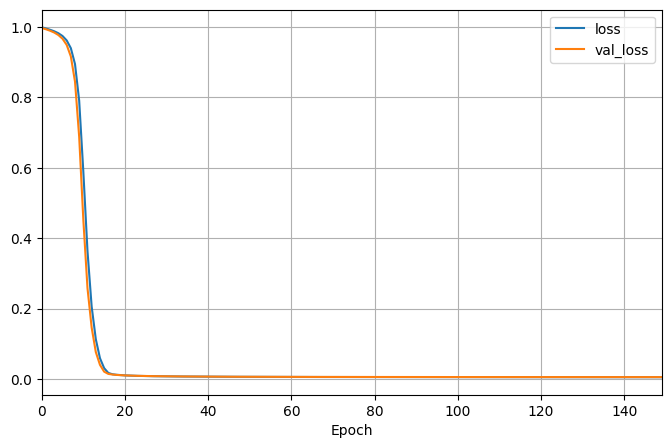

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: Adagrad
  learning rate: 0.01
  loss function: Hinge
  random seed: 704571639
  epochs trained: 150
L2 norms:
  positive: 0.00893715862184763
  negative: 62.68970489501953
  delta: 62.68076705932617
  ratio: 7013.50048828125
 


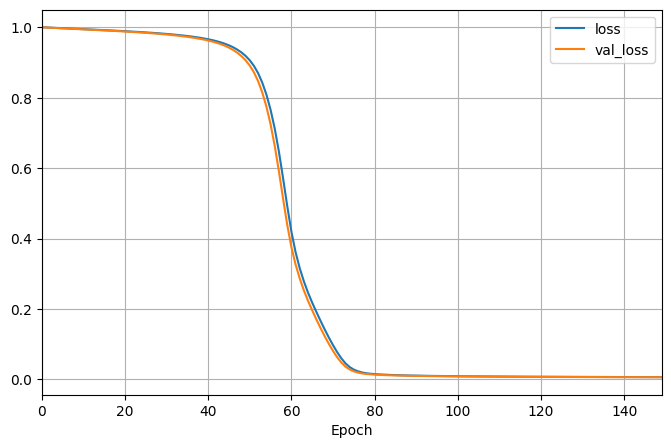

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: Adagrad
  learning rate: 0.01
  loss function: Hinge
  random seed: 110554853
  epochs trained: 150
L2 norms:
  positive: 0.009290210902690887
  negative: 64.3896484375
  delta: 64.38035583496094
  ratio: 6929.9130859375
 


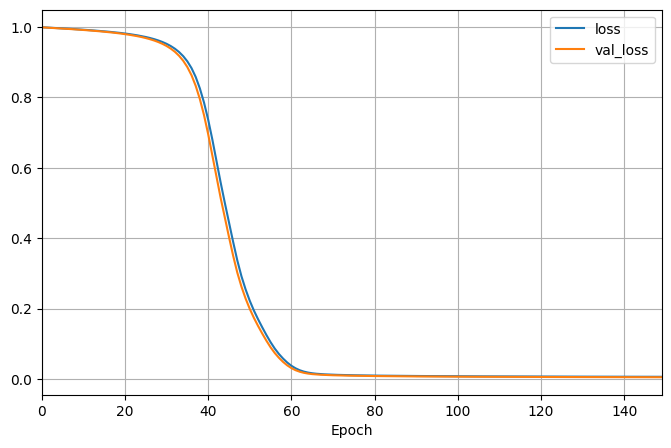

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 739647531
  epochs trained: 150
L2 norms:
  positive: 0.013451707549393177
  negative: 86.28826904296875
  delta: 86.27481842041016
  ratio: 6413.67041015625
 


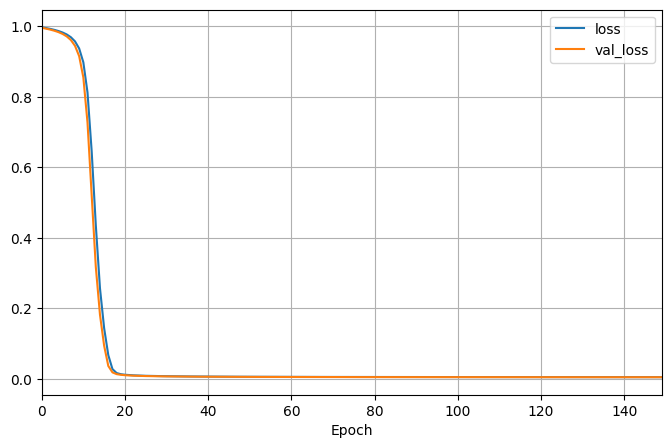

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 197877141
  epochs trained: 150
L2 norms:
  positive: 0.013518857769668102
  negative: 78.54171752929688
  delta: 78.5281982421875
  ratio: 5808.78955078125
 


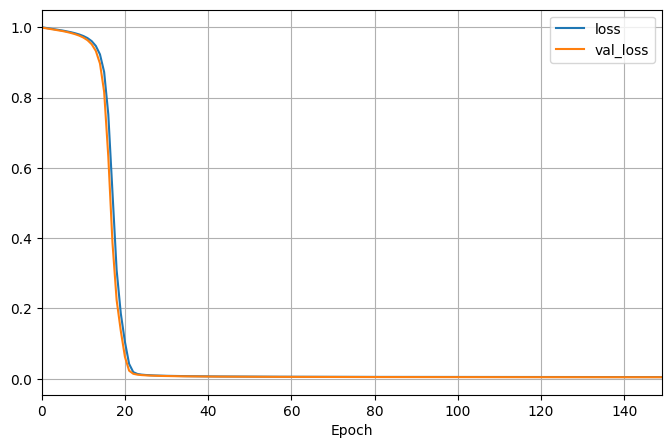

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: RMSprop
  learning rate: 0.01
  loss function: Hinge
  random seed: 998024159
  epochs trained: 80
L2 norms:
  positive: 0.04165596514940262
  negative: 193.73446655273438
  delta: 193.69281005859375
  ratio: 4649.82177734375
 


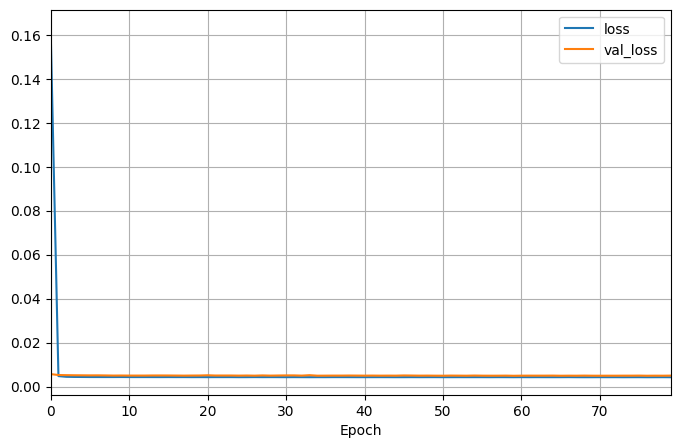

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 150
  optimizer: RMSprop
  learning rate: 0.03
  loss function: Hinge
  random seed: 763213617
  epochs trained: 58
L2 norms:
  positive: 0.050243817269802094
  negative: 223.7725830078125
  delta: 223.7223358154297
  ratio: 4452.73388671875
 


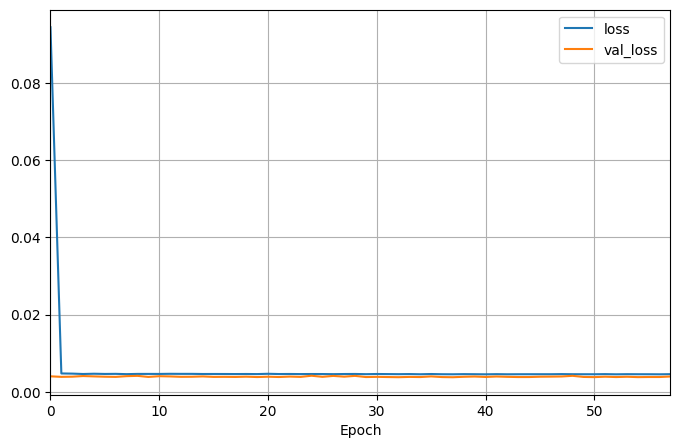

In [5]:
autoencoders = [autoencoder for _, autoencoder in [(eval, ae) for eval, ae in zip(evaluated_autoencoders[0], evaluated_autoencoders[1])] if (autoencoder.euclidean_dist_delta) > 0 and (autoencoder.epochs >= autoencoder.max_epochs /3)]
autoencoders = sorted(autoencoders, key=lambda ae: ae.euclidean_dist_ratio, reverse=True)

# Top 10
for ae in autoencoders[:10]:
    ae.print_evaluation(show_history=True, verbose=True)

### Selection of Promising Autoencoders:

In [4]:


#print(f'Starting training for selected autoencoders:')
# Selected Autoencoders in order of highest l2 ratio value
selected = [
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.03, 'Hinge', random_state=541977716, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.01, 'Hinge', random_state=158242274, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.01, 'Hinge', random_state=134121857, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.01, 'Hinge', random_state=371590359, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.03, 'Hinge', random_state=343408134, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'Adagrad', 0.01, 'Hinge', random_state=361315766, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'Adam', 0.01, 'Hinge', random_state=577324980, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.01, 'Hinge', random_state=577147683, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.05, 'Hinge', random_state=5753662, early_stopping_patience=20),
    #Autoencoder(X, DATA_PASSWORD, 'RMSprop', 0.01, 'Hinge', random_state=310277169, early_stopping_patience=20),
]

Starting training for selected autoencoders:


# Classifier Evaluation

In [38]:
%run "./4_Classifier.ipynb"
# Hyperparameter evaluation code moved to 4_Classifier.ipynb
# find_classifier_hyperparameters(autoencoders, direct_to_file=True)

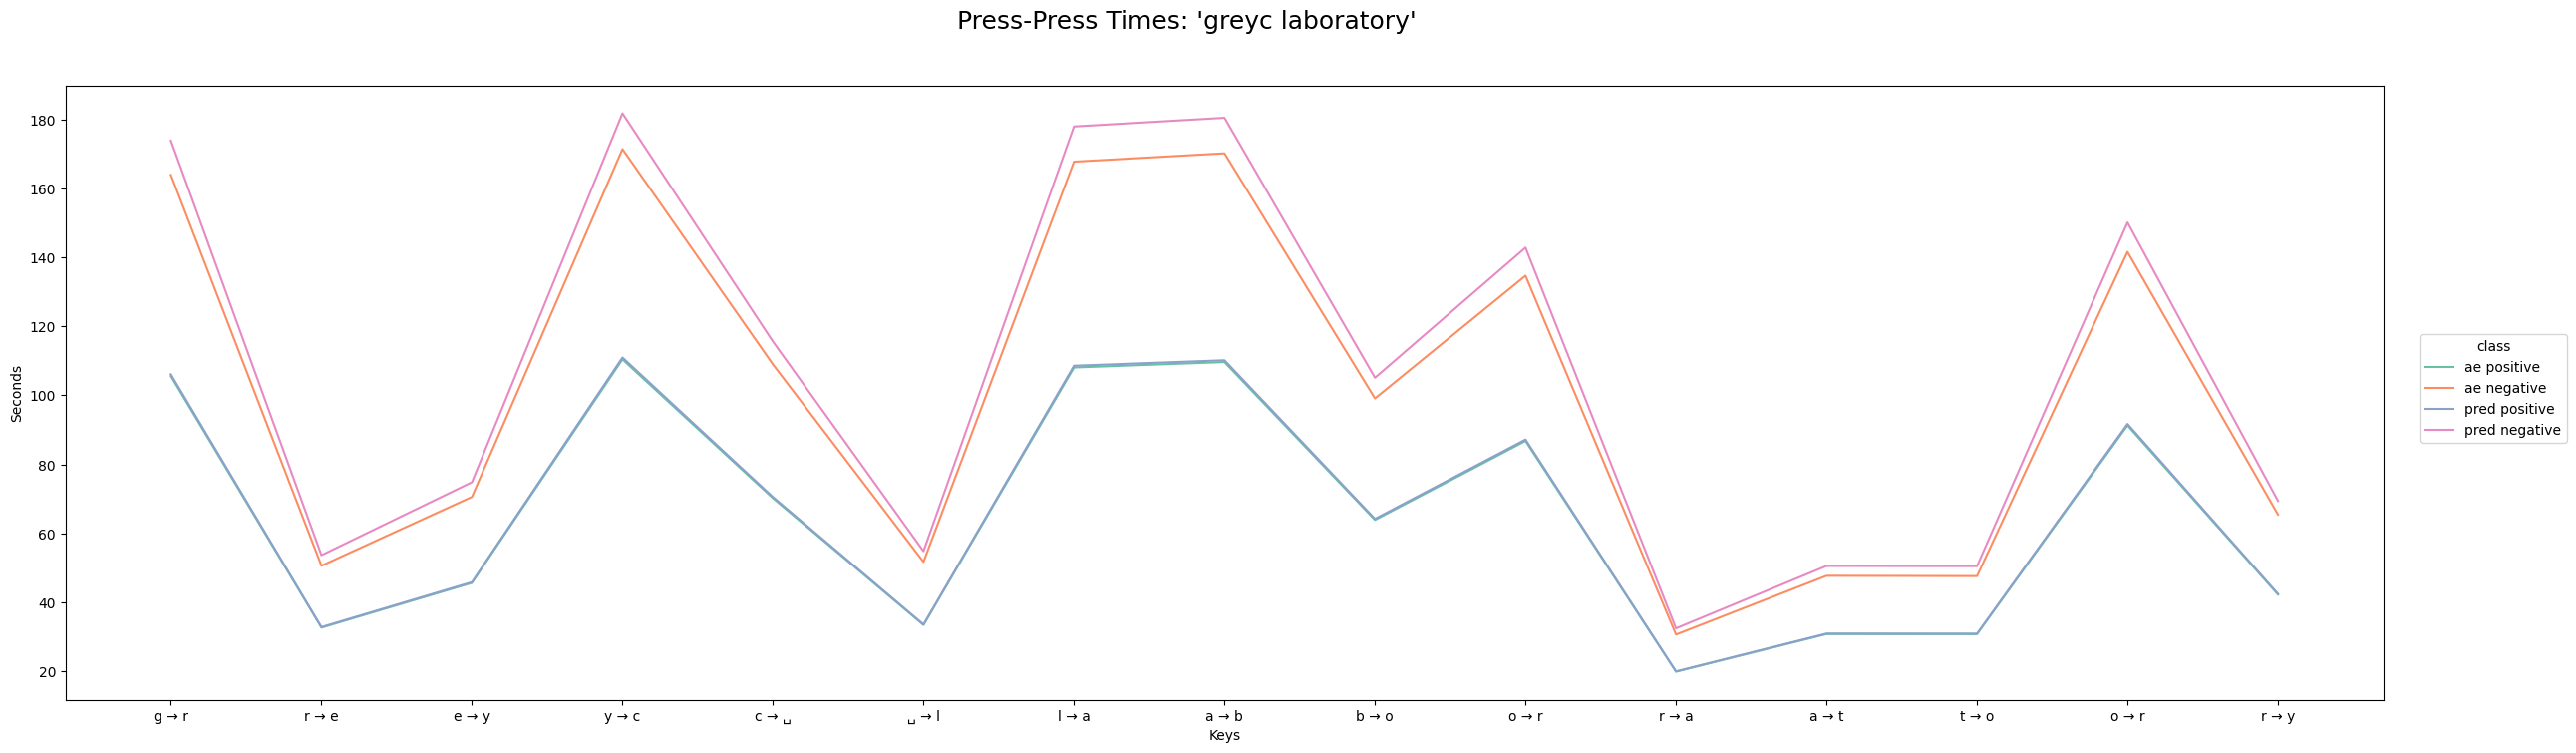

Predicted positives: 105/115 (91.304%)
Predicted negatives: 7059/7367 (95.819%)
Classifier Model:
  autoencoder: RMSprop (lr=0.05) - Hinge - seed=253681592
    euclidean dist (augmented): 0.03335677832365036
    euclidean dist delta: 285.347412109375
    euclidean dist ratio: 8554.4052734375
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 600
  random seed: 149694655
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 942.0
  true negatives: 18996.0
  false positives: 3.0
  false negatives: 9.0
  accuracy: 0.9993984699249268
  precision: 0.9968253970146179
  recall: 0.9905362725257874
  specificity: 0.9999473690986633
  loss: 0.003436888102442026
  area under curve: 0.9999903440475464
  precision recall curve: 0.9997968673706055
 


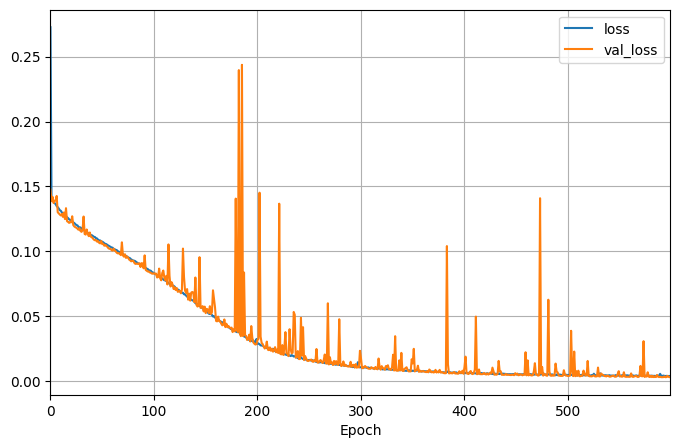

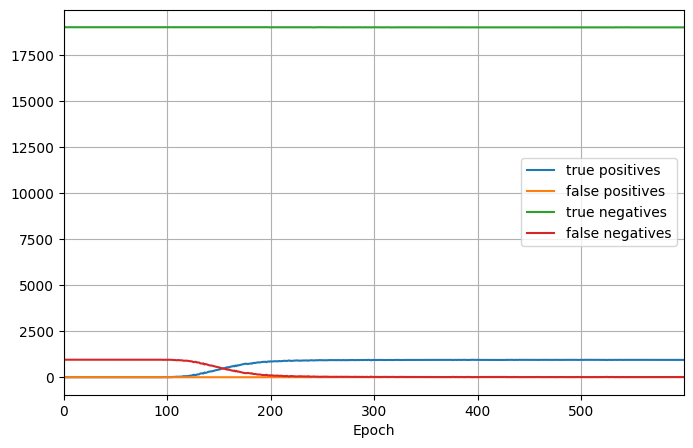

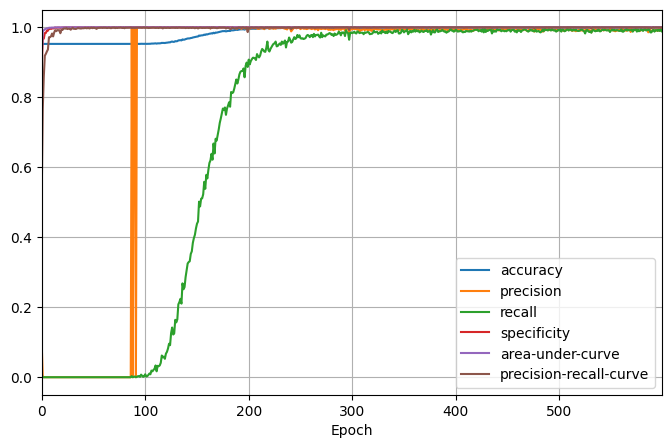

------------------------------------------------------------


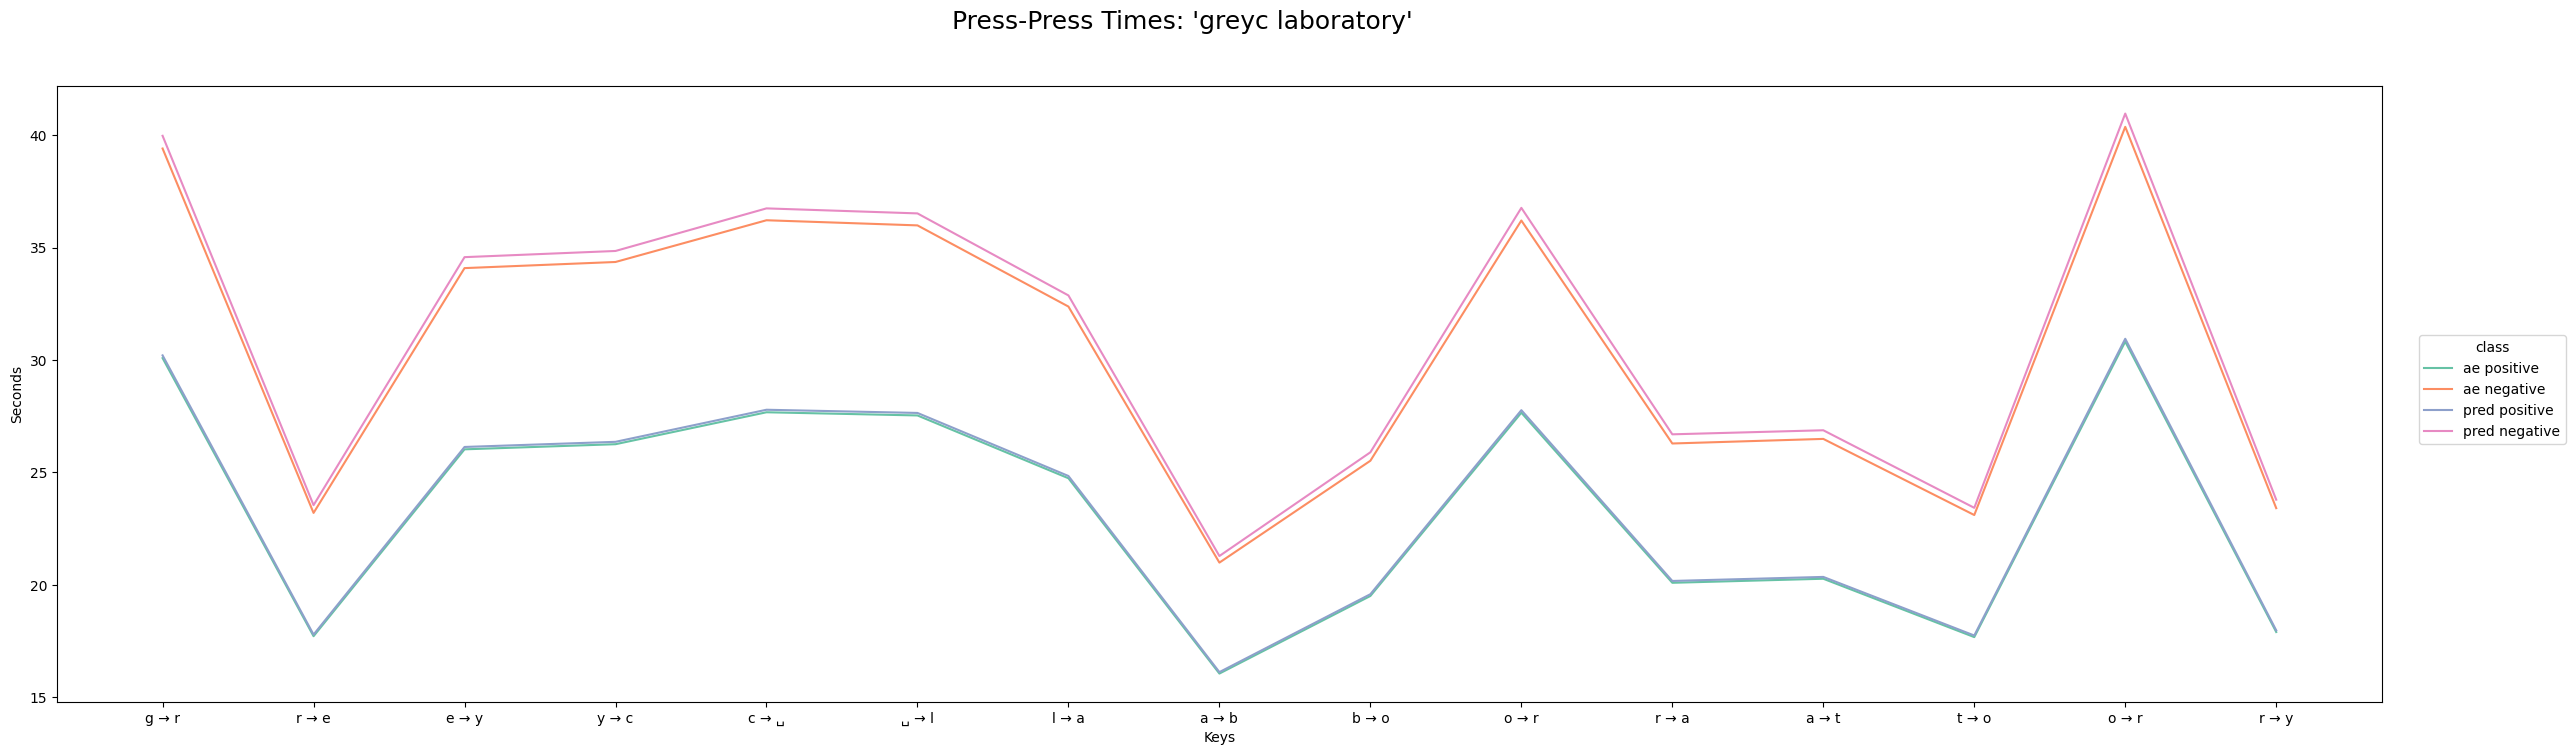

Predicted positives: 109/115 (94.783%)
Predicted negatives: 6268/7367 (85.082%)
Classifier Model:
  autoencoder: Adagrad (lr=0.01) - Hinge - seed=856838533
    euclidean dist (augmented): 0.007324425503611565
    euclidean dist delta: 60.033660888671875
    euclidean dist ratio: 8196.3642578125
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 297
  random seed: 43965031
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 951.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 0.0
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  specificity: 1.0
  loss: 0.0013045987579971552
  area under curve: 0.9999999403953552
  precision recall curve: 1.0
 


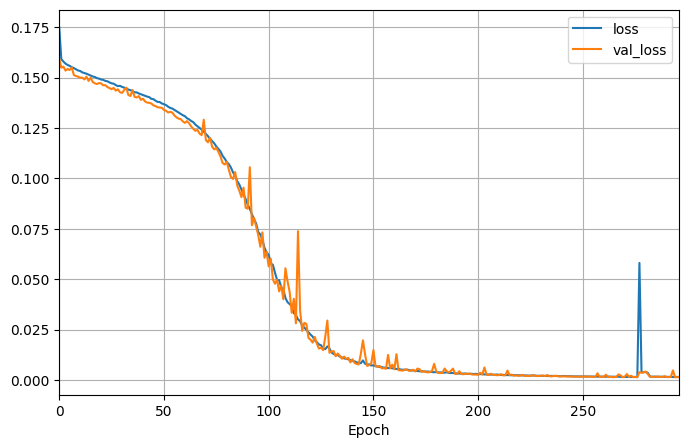

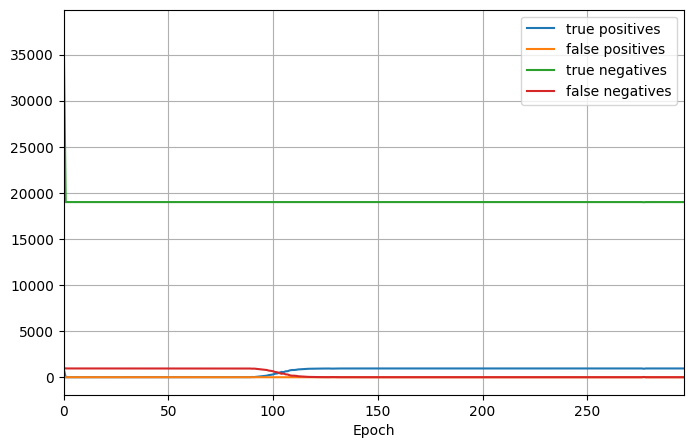

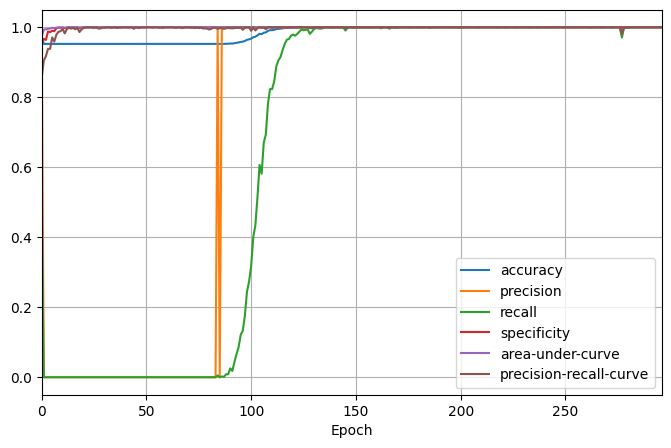

------------------------------------------------------------


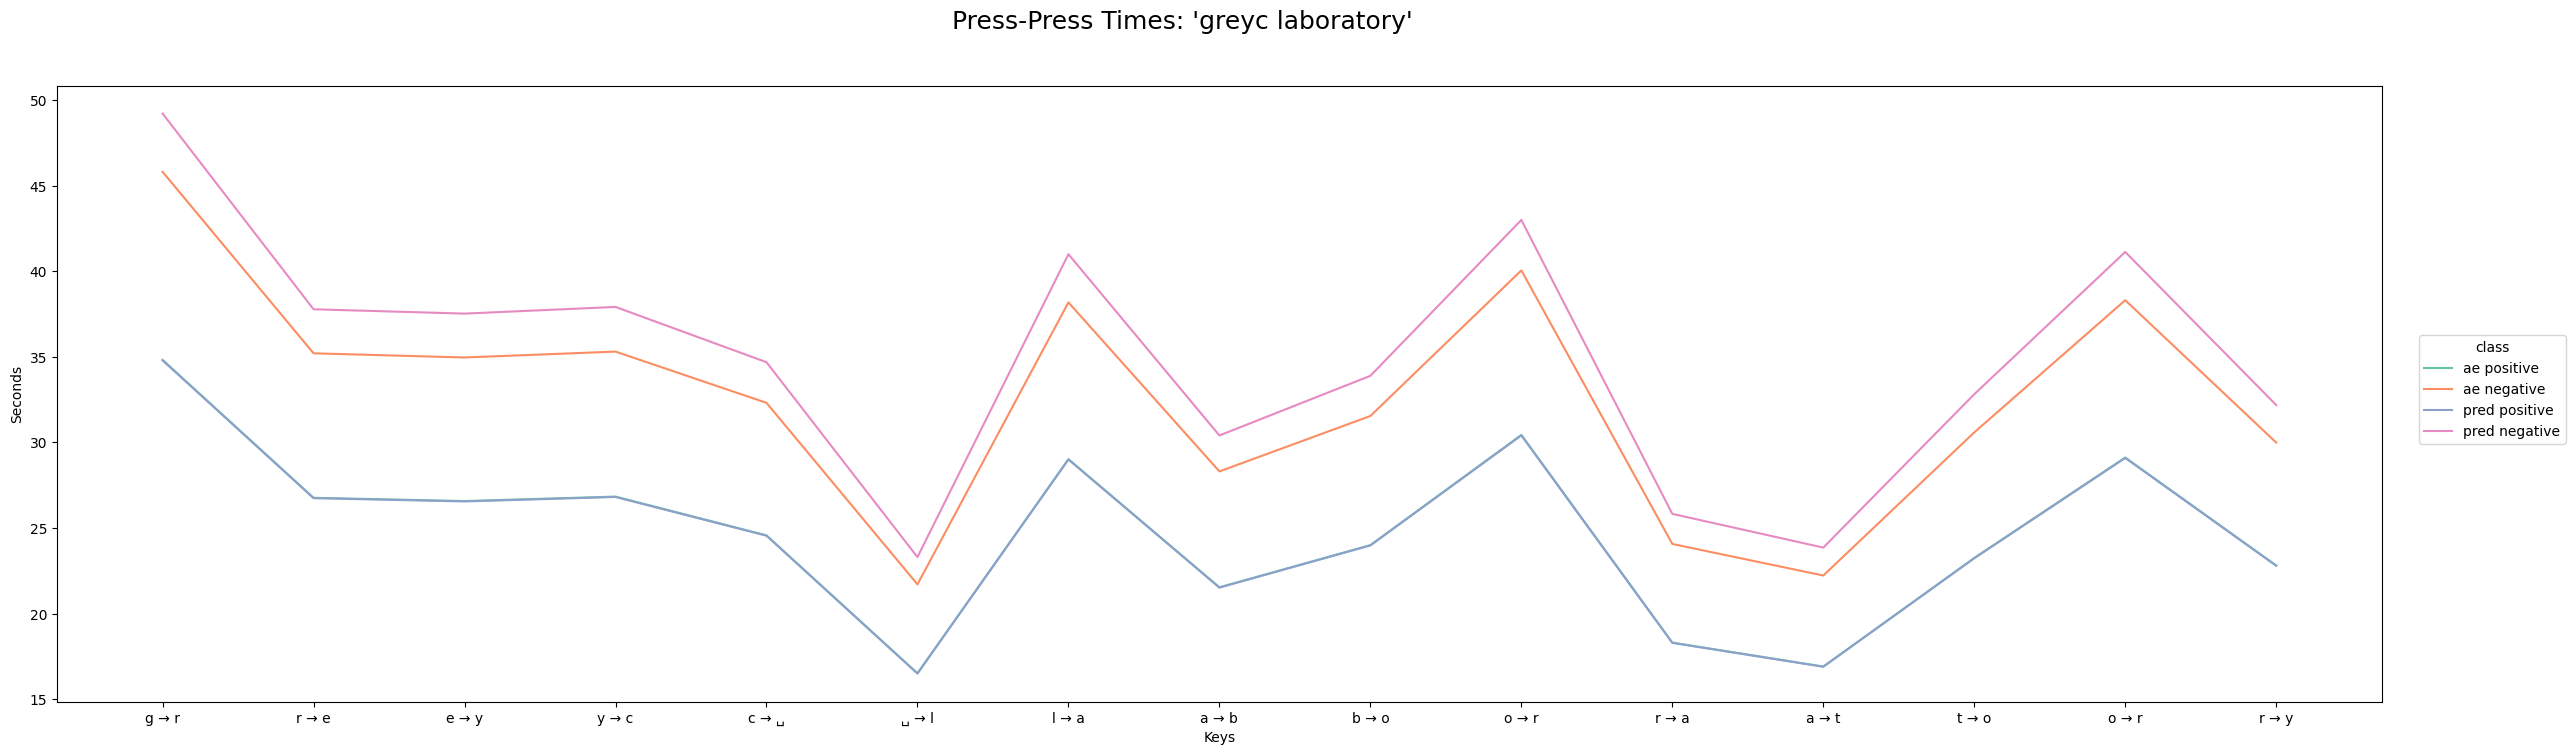

Predicted positives: 104/115 (90.435%)
Predicted negatives: 6490/7367 (88.096%)
Classifier Model:
  autoencoder: Adagrad (lr=0.01) - Hinge - seed=429792972
    euclidean dist (augmented): 0.008370128460228443
    euclidean dist delta: 63.505332946777344
    euclidean dist ratio: 7587.1396484375
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 281
  random seed: 95681622
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 951.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 0.0
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  specificity: 1.0
  loss: 0.0031581195071339607
  area under curve: 0.9999999403953552
  precision recall curve: 1.0
 


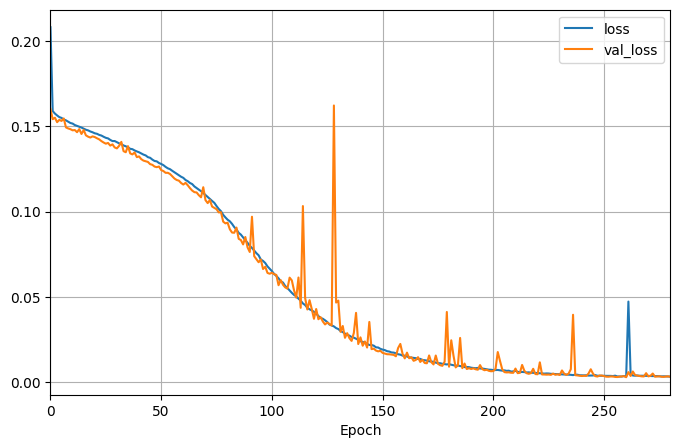

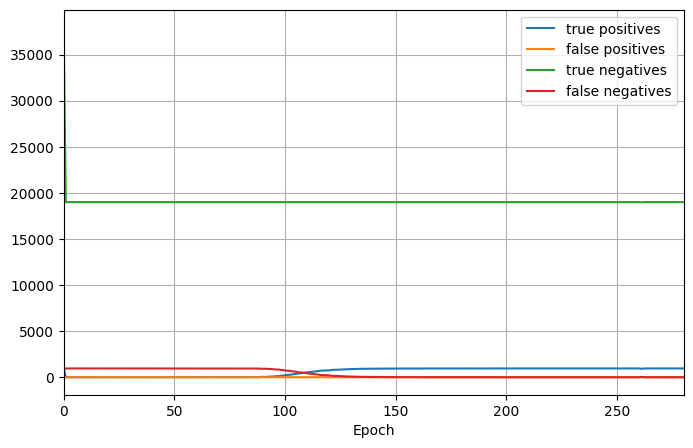

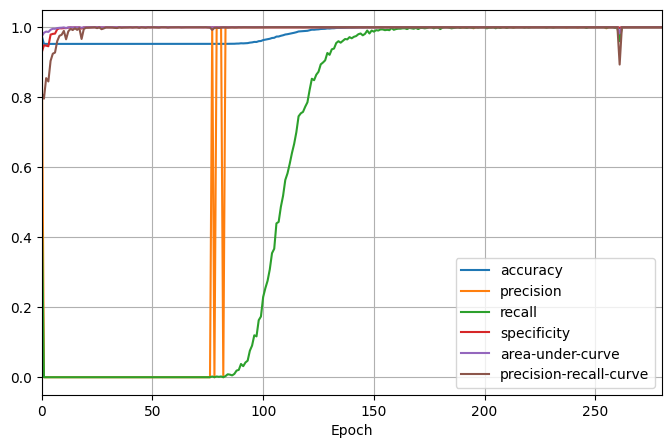

------------------------------------------------------------


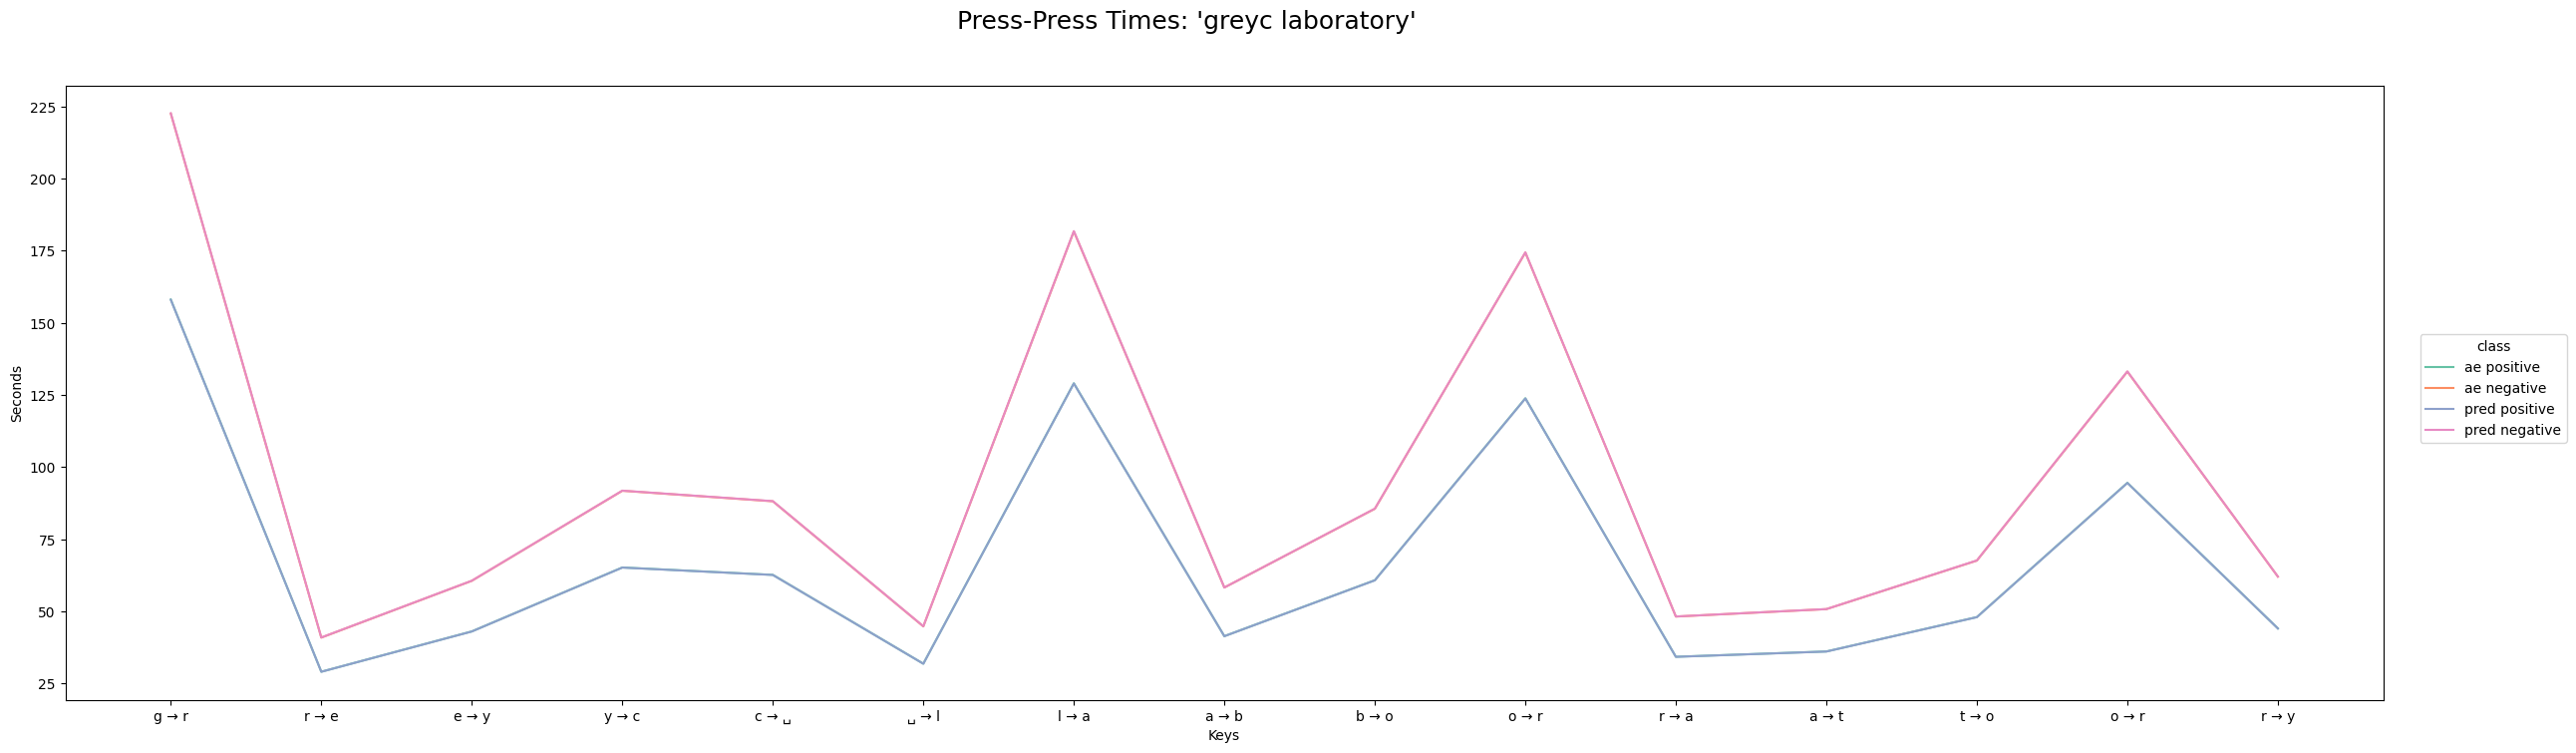

Predicted positives: 101/115 (87.826%)
Predicted negatives: 6854/7367 (93.037%)
Classifier Model:
  autoencoder: RMSprop (lr=0.01) - Hinge - seed=443604602
    euclidean dist (augmented): 0.02931150794029236
    euclidean dist delta: 208.3402099609375
    euclidean dist ratio: 7107.7958984375
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 199
  random seed: 410394256
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 951.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 0.0
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  specificity: 1.0
  loss: 0.022552045062184334
  area under curve: 1.0
  precision recall curve: 1.0
 


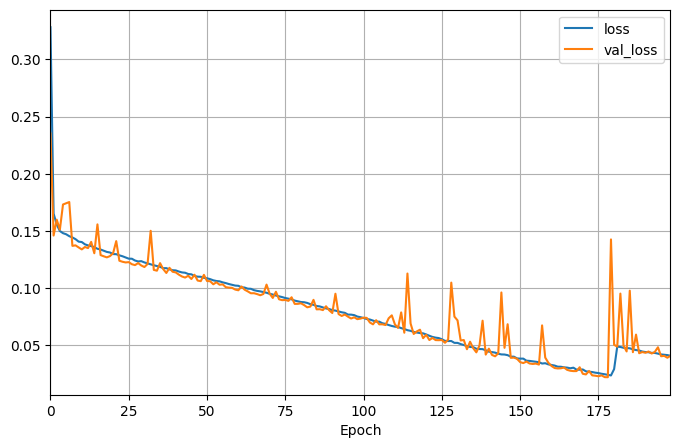

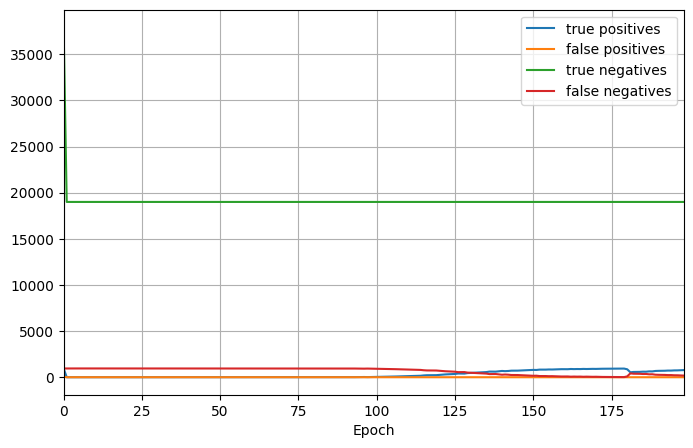

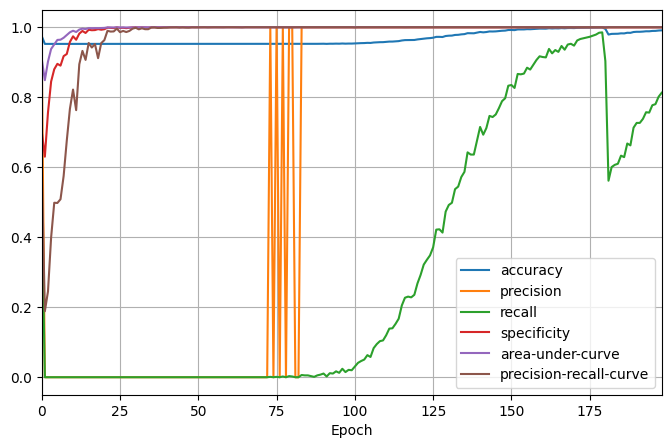

------------------------------------------------------------


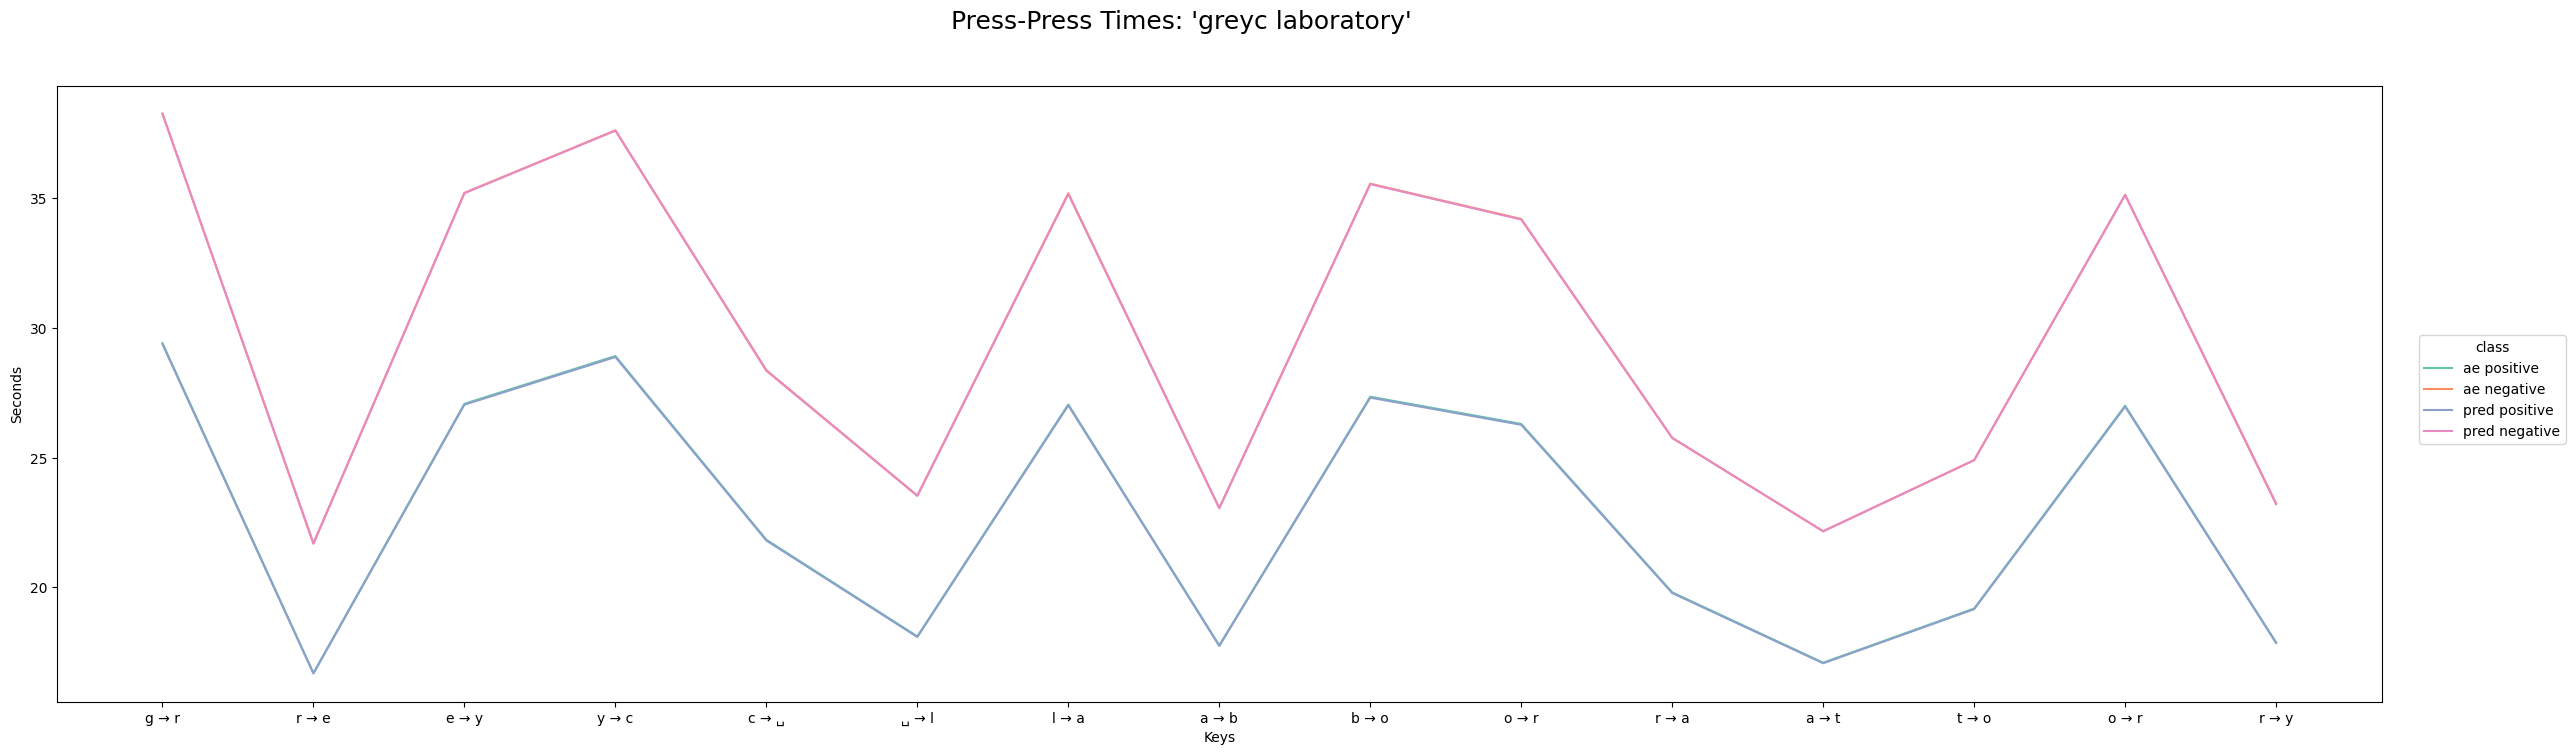

Predicted positives: 103/115 (89.565%)
Predicted negatives: 6207/7367 (84.254%)
Classifier Model:
  autoencoder: Adagrad (lr=0.01) - Hinge - seed=471535056
    euclidean dist (augmented): 0.010184984654188156
    euclidean dist delta: 56.7249870300293
    euclidean dist ratio: 5569.47216796875
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 600
  random seed: 715329406
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 951.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 0.0
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  specificity: 1.0
  loss: 0.002872554585337639
  area under curve: 1.0
  precision recall curve: 1.0
 


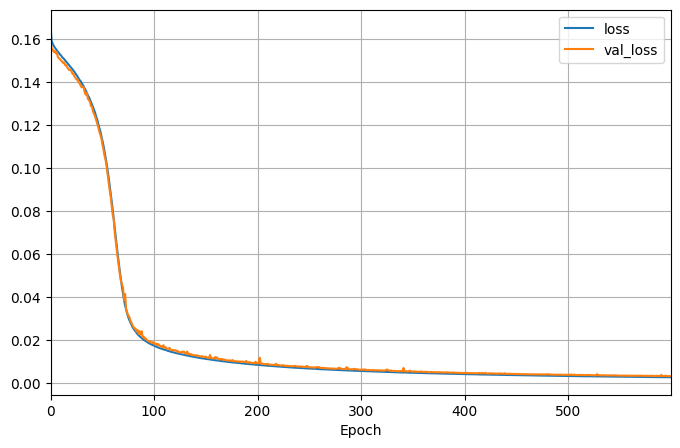

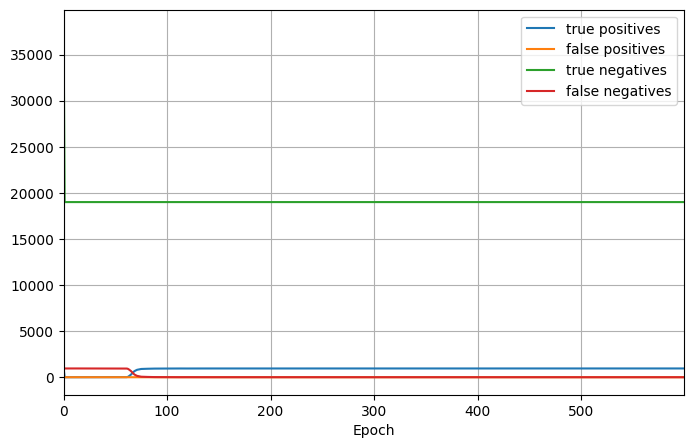

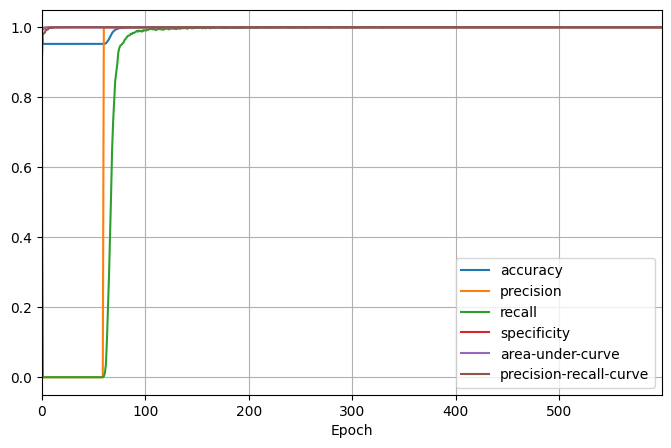

------------------------------------------------------------


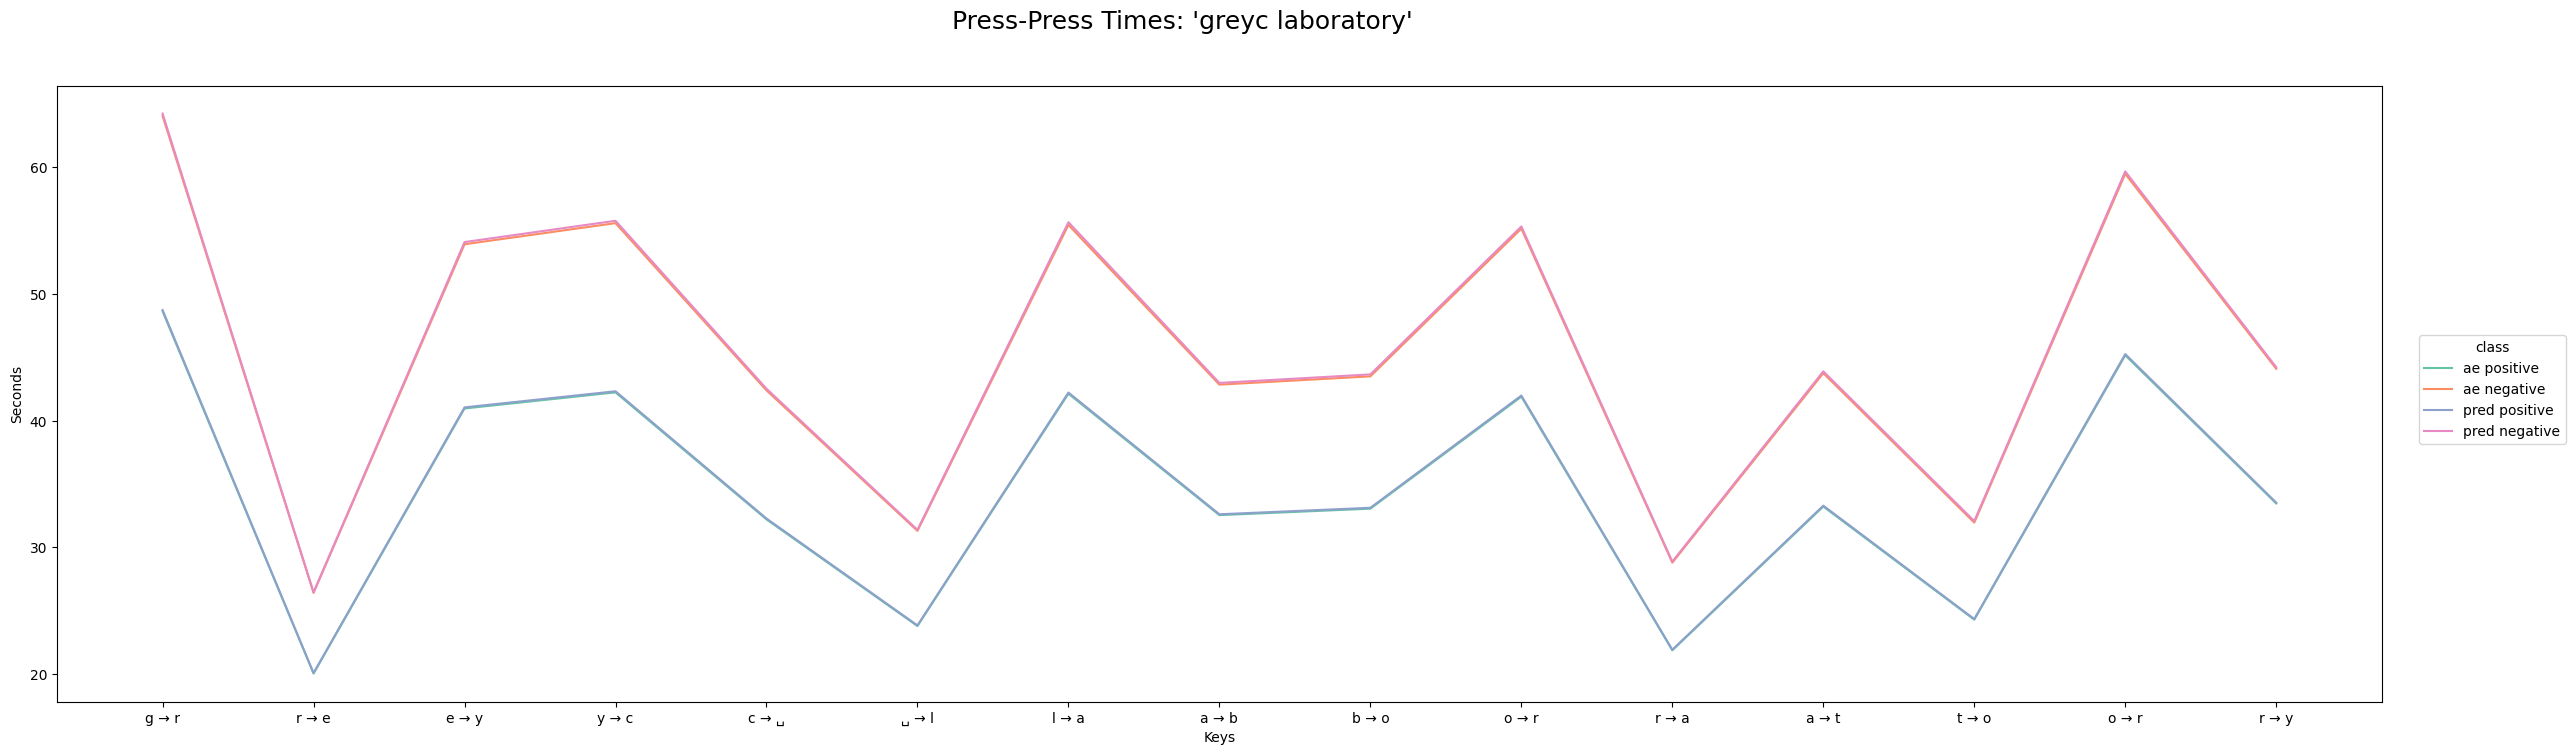

Predicted positives: 101/115 (87.826%)
Predicted negatives: 6439/7367 (87.403%)
Classifier Model:
  autoencoder: Adagrad (lr=0.03) - Hinge - seed=359150371
    euclidean dist (augmented): 0.01567346788942814
    euclidean dist delta: 85.3015365600586
    euclidean dist ratio: 5442.41650390625
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 239
  random seed: 382501673
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 950.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 1.0
  accuracy: 0.9999498724937439
  precision: 1.0
  recall: 0.9989484548568726
  specificity: 1.0
  loss: 0.017541278153657913
  area under curve: 1.0
  precision recall curve: 1.0
 


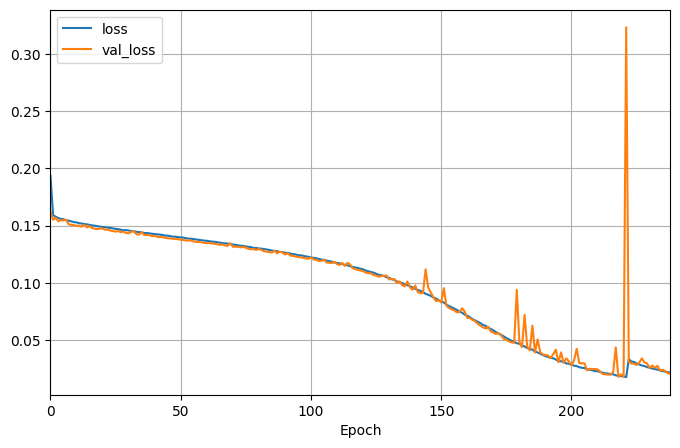

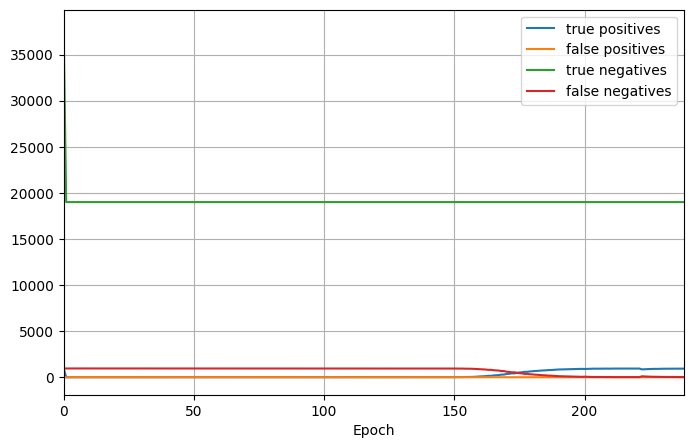

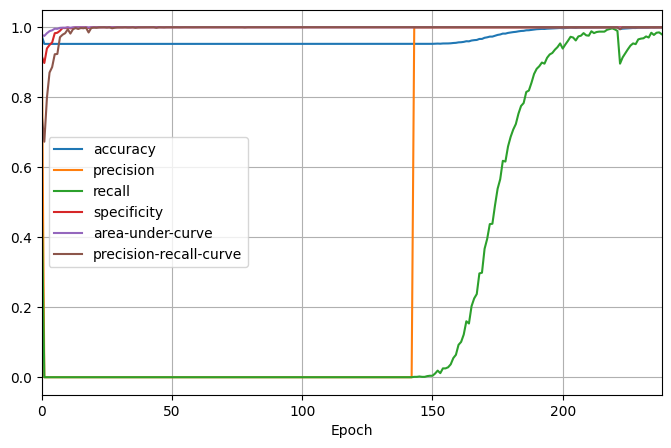

------------------------------------------------------------


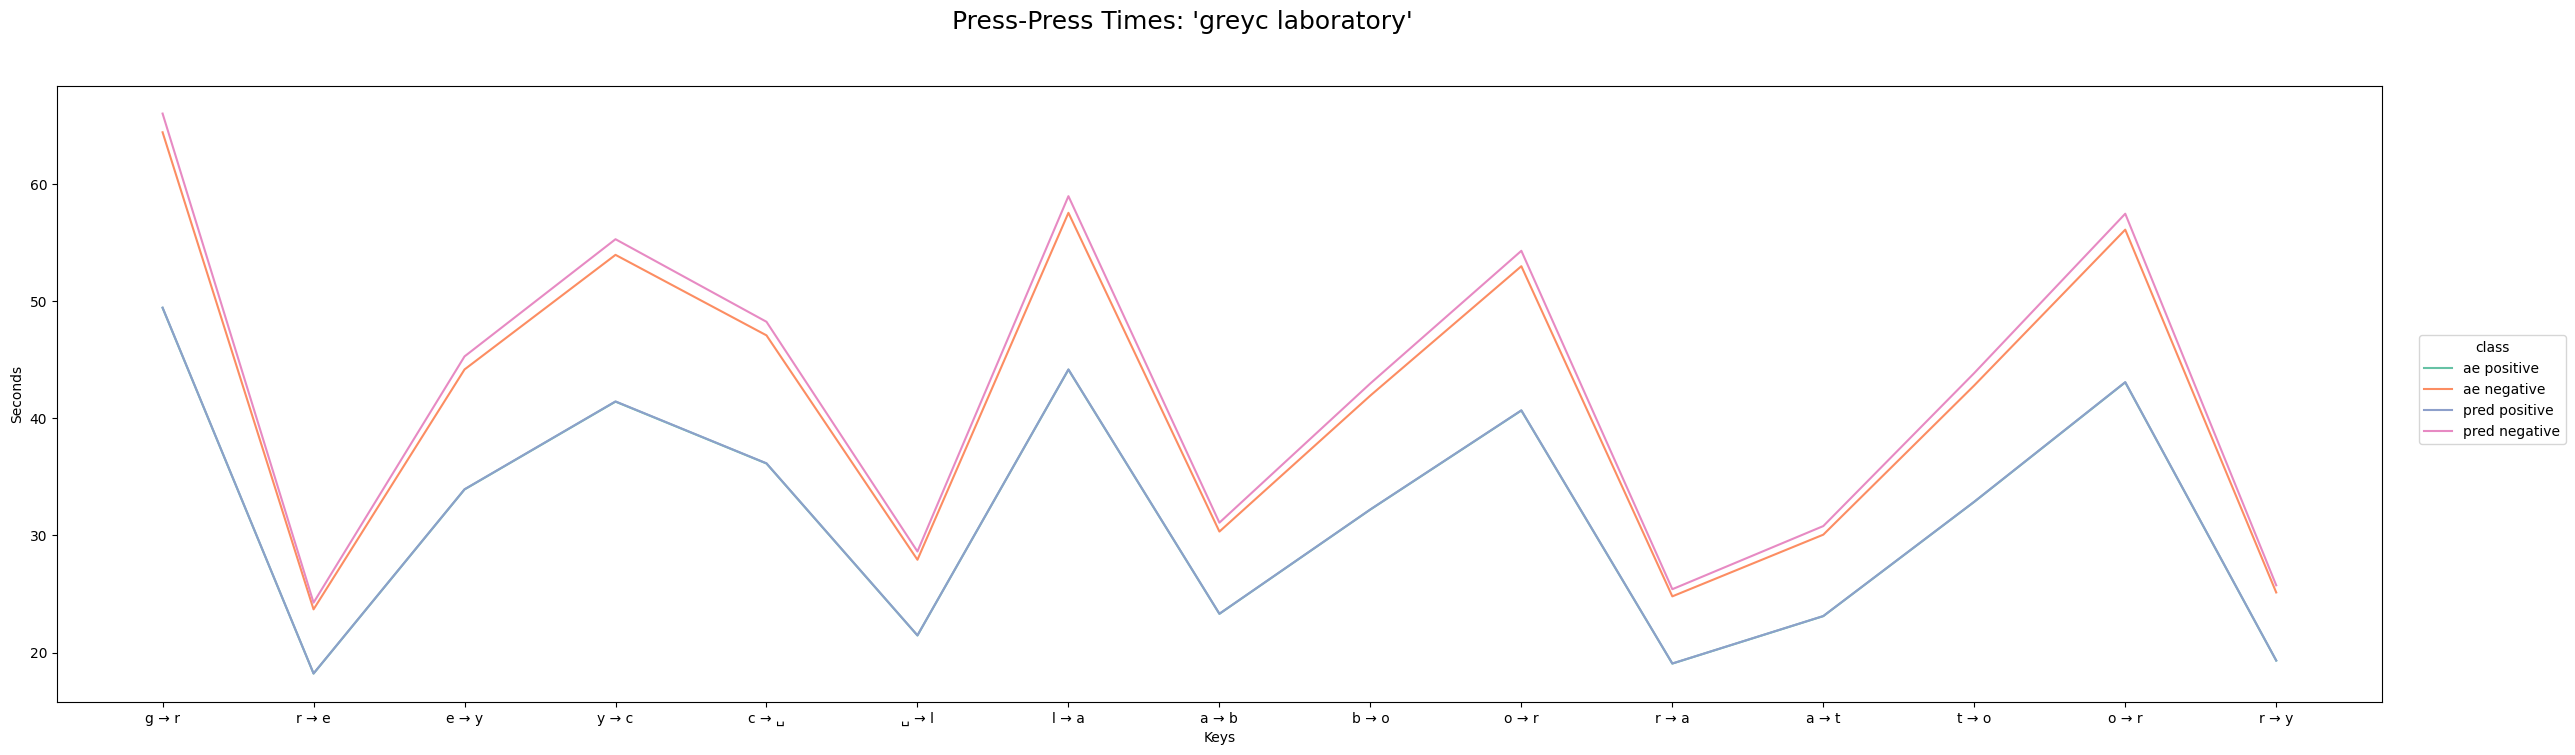

Predicted positives: 110/115 (95.652%)
Predicted negatives: 6208/7367 (84.268%)
Classifier Model:
  autoencoder: Adagrad (lr=0.03) - Hinge - seed=66383957
    euclidean dist (augmented): 0.017488975077867508
    euclidean dist delta: 80.06797790527344
    euclidean dist ratio: 4578.197265625
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 600
  random seed: 206371779
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 951.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 0.0
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  specificity: 1.0
  loss: 0.0007422554190270603
  area under curve: 1.0
  precision recall curve: 1.0
 


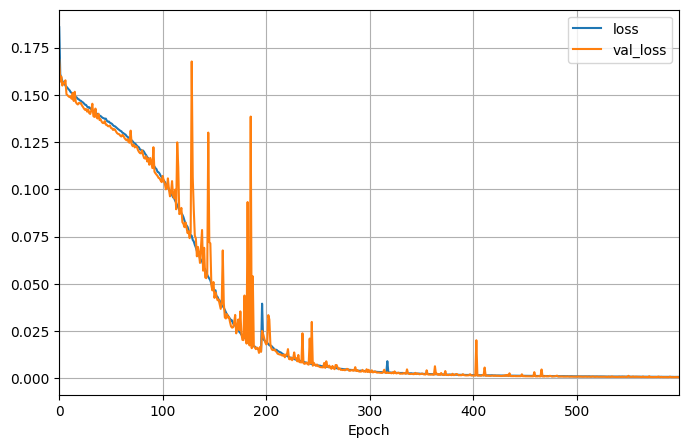

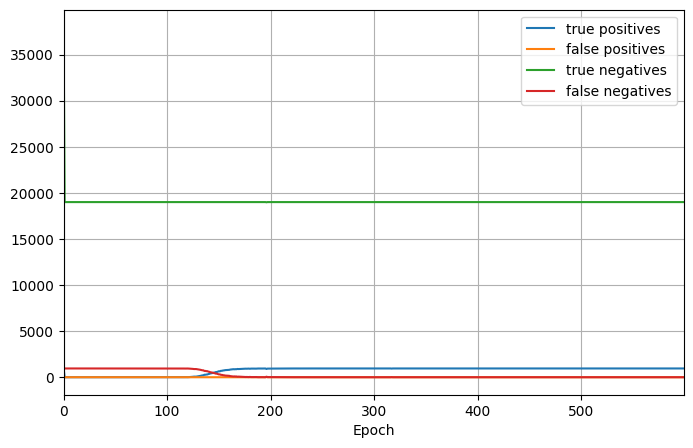

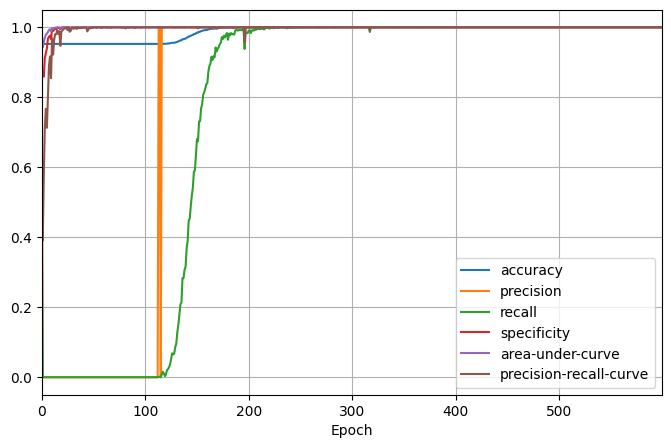

------------------------------------------------------------


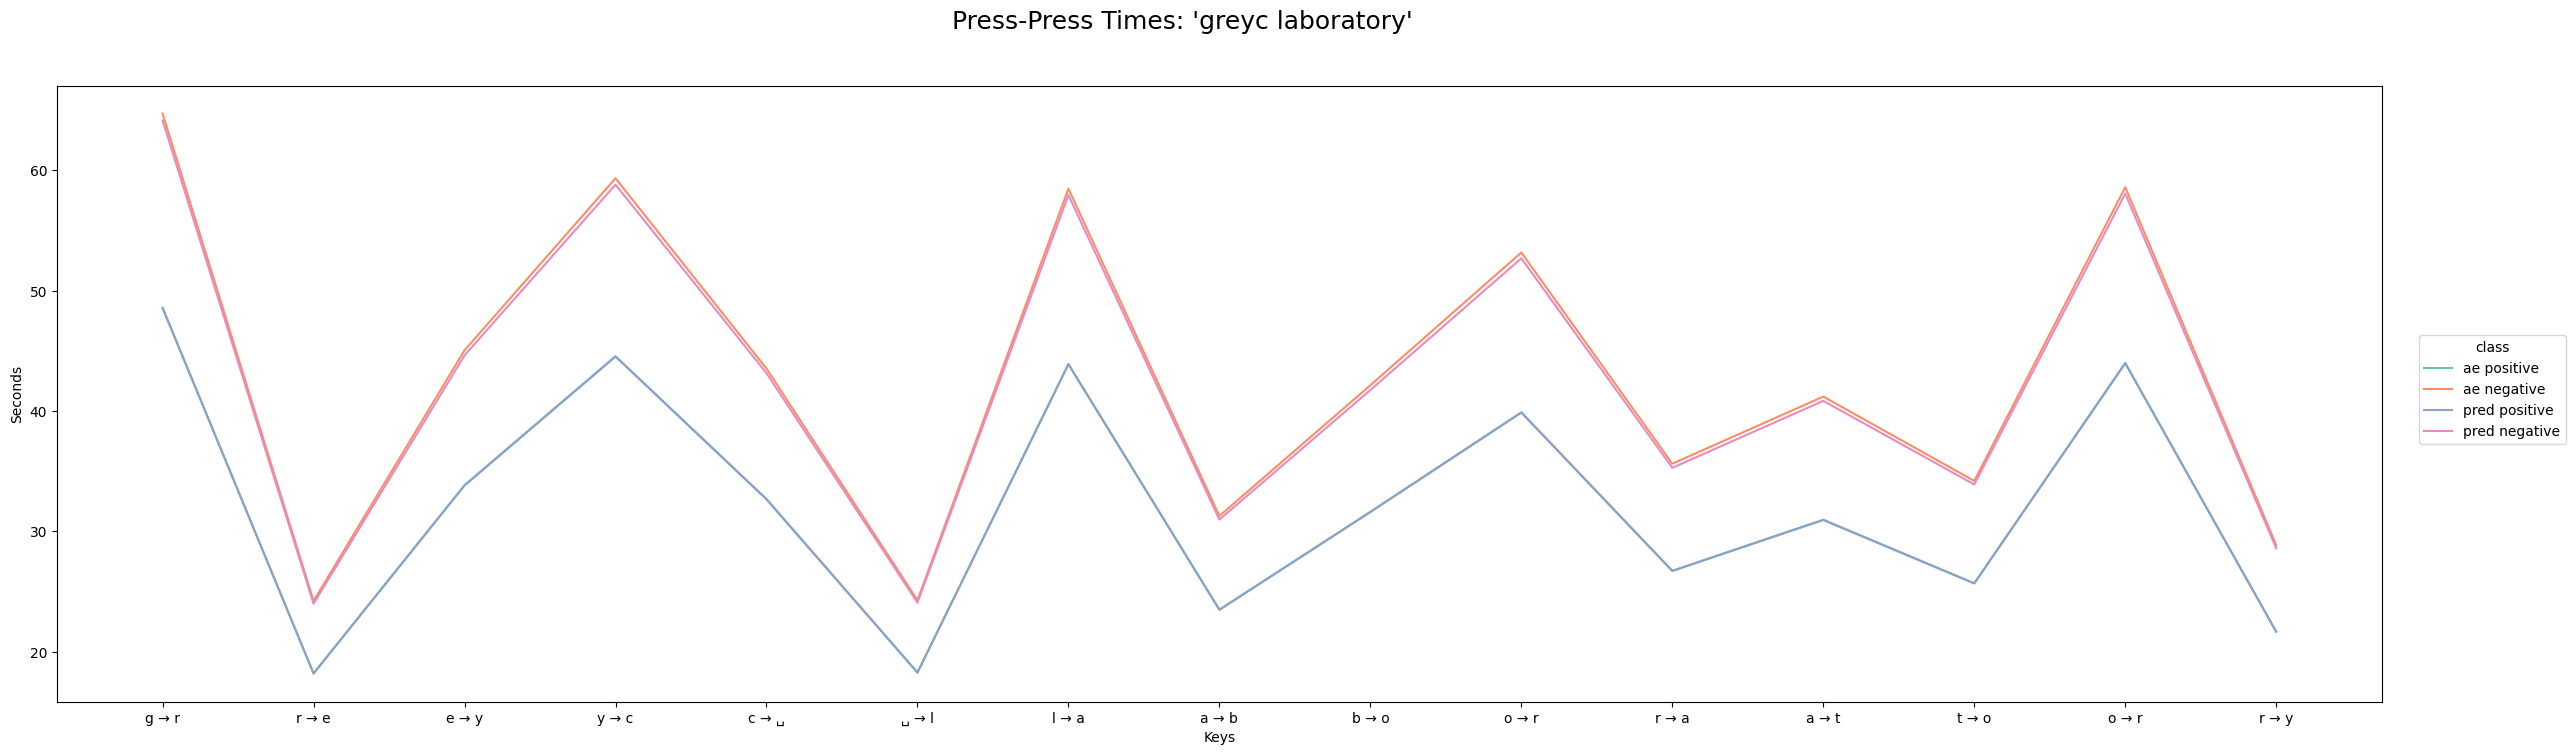

Predicted positives: 110/115 (95.652%)
Predicted negatives: 5881/7367 (79.829%)
Classifier Model:
  autoencoder: Adagrad (lr=0.03) - Hinge - seed=808143209
    euclidean dist (augmented): 0.024015825241804123
    euclidean dist delta: 84.51016998291016
    euclidean dist ratio: 3518.936767578125
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 434
  random seed: 590209105
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 951.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 0.0
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  specificity: 1.0
  loss: 0.0014082135166972876
  area under curve: 1.0
  precision recall curve: 0.9999999403953552
 


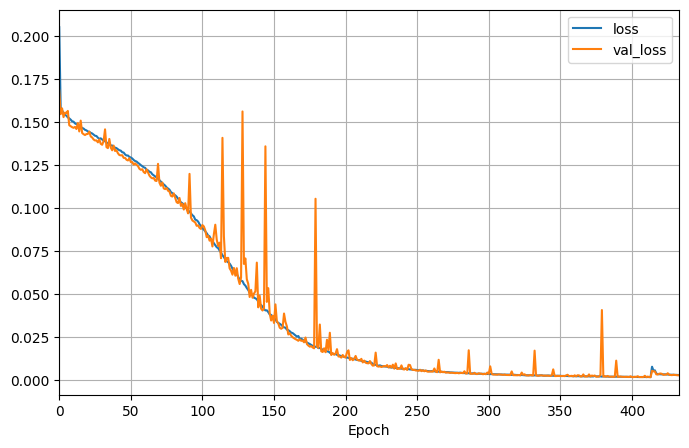

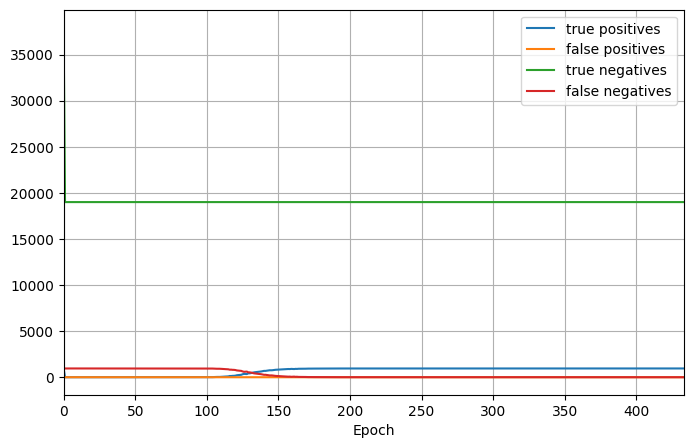

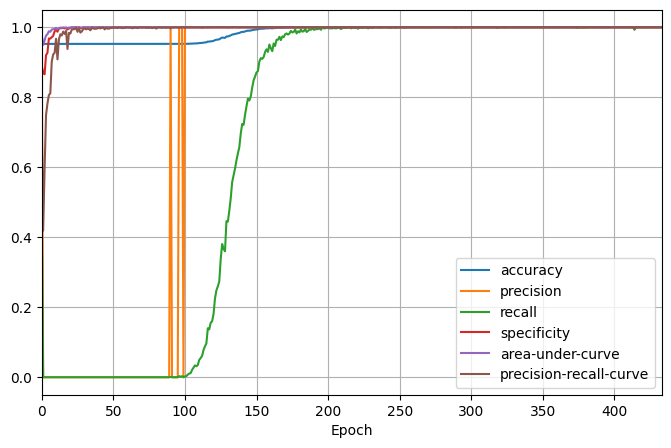

------------------------------------------------------------


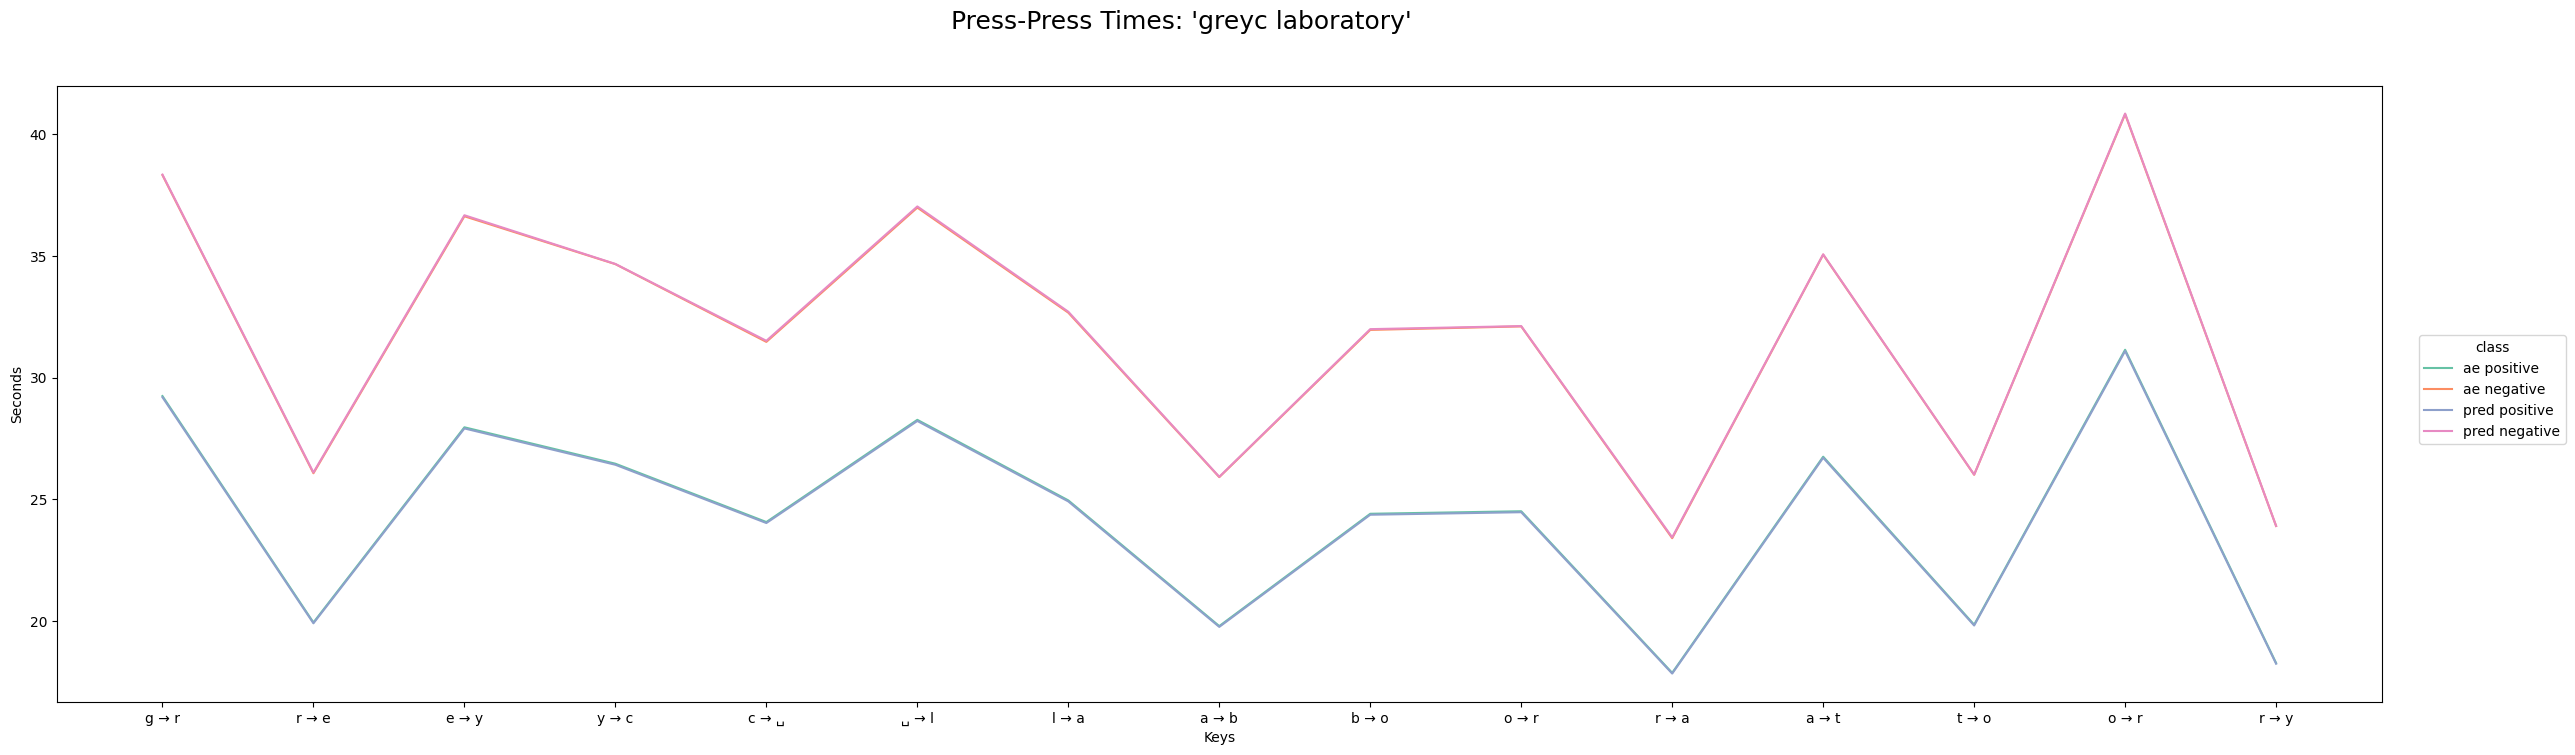

Predicted positives: 109/115 (94.783%)
Predicted negatives: 6030/7367 (81.851%)
Classifier Model:
  autoencoder: Adagrad (lr=0.01) - Hinge - seed=527286895
    euclidean dist (augmented): 0.017535114660859108
    euclidean dist delta: 59.316837310791016
    euclidean dist ratio: 3382.745849609375
  optimizer: Ftrl
  learning rate: 0.01
  loss function: BinaryCrossentropy
  epochs: 600
  random seed: 314641717
  early stopping patience:  20
  positive sample size: 1000
  negative sample size: 20000
Training Results: 
  true positives: 951.0
  true negatives: 18999.0
  false positives: 0.0
  false negatives: 0.0
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  specificity: 1.0
  loss: 0.0006656675832346082
  area under curve: 1.0
  precision recall curve: 0.9999999403953552
 


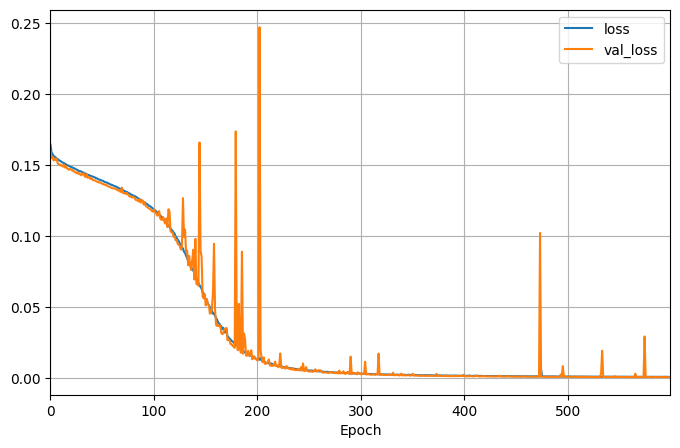

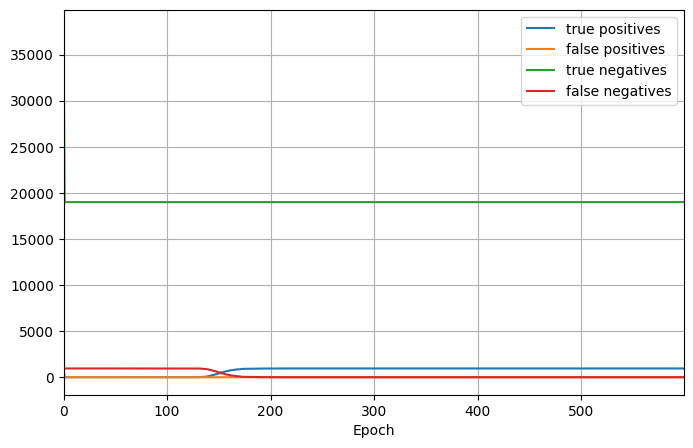

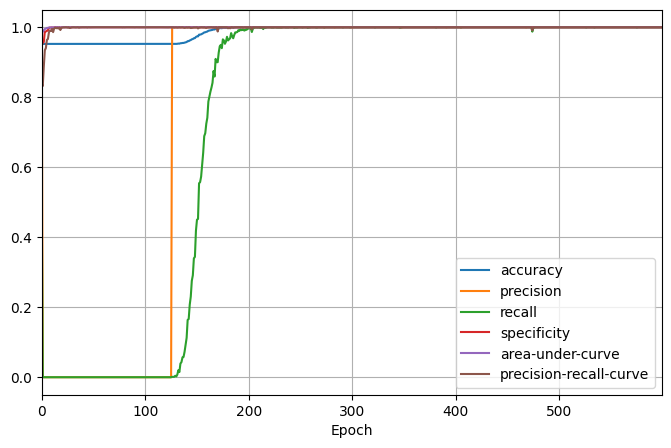

------------------------------------------------------------


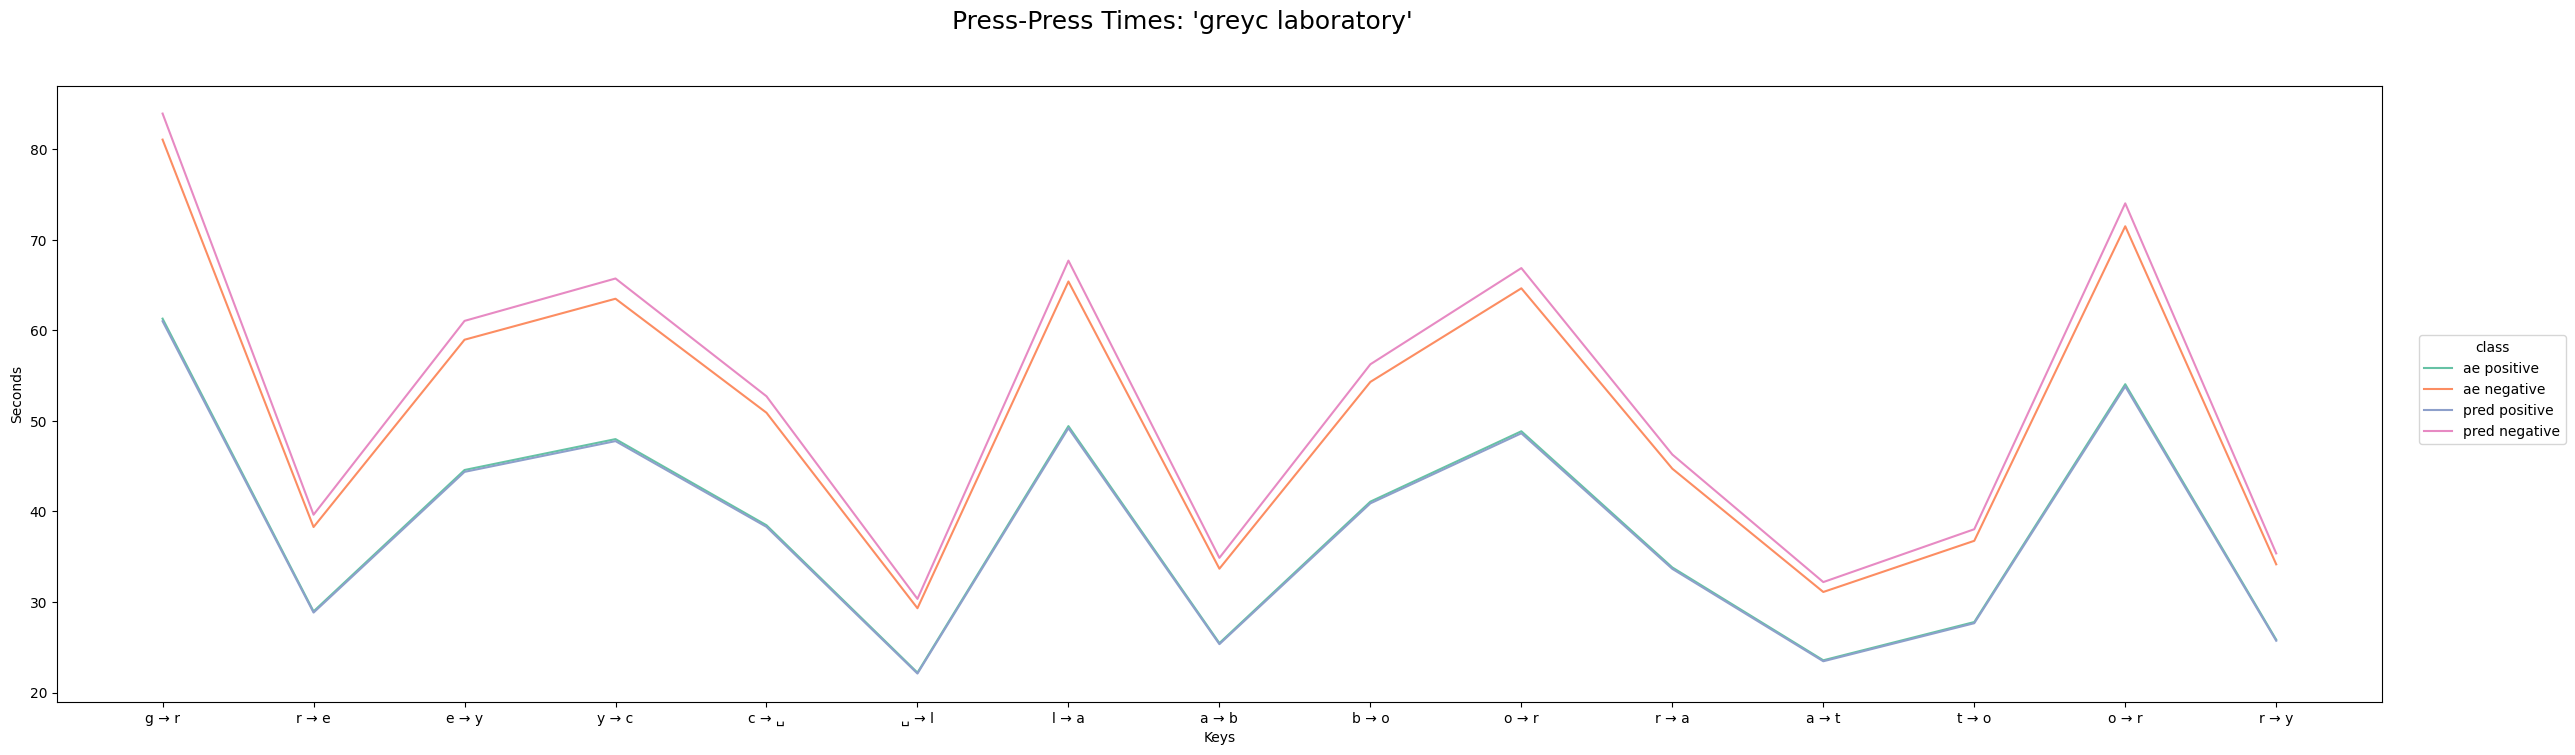

In [ ]:
X = positive_class_data[DATA_COLS].values
N = negative_class_data[DATA_COLS].values

for autoencoder in autoencoders:   
    pred_positive = autoencoder.predict(X[np.random.choice(len(X), 100, replace=False)])
    pred_negative = autoencoder.predict(N[np.random.choice(len(N), 100, replace=False)])

    ae_pos = autoencoder.generate_positive(1000)
    ae_neg = autoencoder.generate_negative(1000)
    
    ae_positive_dataframe = create_dataframe(ae_pos, 'ae positive', DATA_COLS)
    ae_negative_dataframe = create_dataframe(ae_neg, 'ae negative', DATA_COLS)
    pred_positive_dataframe = create_dataframe(pred_positive, 'pred positive', DATA_COLS)
    pred_negative_dataframe = create_dataframe(pred_negative, 'pred negative', DATA_COLS)

    
    combined_dataframe = pd.concat([ae_positive_dataframe, ae_negative_dataframe, pred_positive_dataframe, pred_negative_dataframe], ignore_index=True)
    for key_col in KEY_COLS:
        combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')
    
    plot_pp_data(combined_dataframe, DATA_PASSWORD, 
        class_categories=['ae positive', 'ae negative', 'pred positive', 'pred negative'],
        target_category=None,
        plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
        trim_outliers=True,
        display=True,
        save=False
    )
    
    classifier = Classifier(autoencoder, 'Ftrl', 0.01, 'BinaryCrossentropy', epochs=600, early_stopping_patience=20, cross_validation_split=1)
    classifier.print_evaluation(show_history=True)
    print('Evaluation with real typing data: ')
    evaluate_authentication(classifier, positive_class_data, negative_class_data)
    print('---'*20)

### Evaluating Best Performing Classifiers with selected autoencoders:

### Best Performing Autoencoders

### Best Performing Classifiers:
#### (Evaluating Classifier on Real Negative Typing Data)